In [1]:
import numpy as np
import importlib
from datetime import datetime
import gc
import json

from helpers import pre_processing_wlan_utils as preprocess_utils
from helpers import classifier_wlan_spectral_utils as classifier_utils
from helpers import tr_models as tr_models

1 Physical GPUs, 1 Logical GPUs


In [2]:
importlib.reload(tr_models)
importlib.reload(classifier_utils)
importlib.reload(preprocess_utils)

1 Physical GPUs, 1 Logical GPUs


<module 'helpers.pre_processing_wlan_utils' from '/home/mcamelo/development/traffic-recognition-2020/source_code/python/helpers/pre_processing_wlan_utils.py'>

In [3]:
seed = 42
task = "frames"
label = preprocess_utils.label_index[task]
num_classes = preprocess_utils.num_classes[task]
labels_string = preprocess_utils.labels_string[task]
print("Label id: ", label)
print("Num classes in that label: ", num_classes)
print("Labels: ", labels_string)
max_iq_samples = [100, 300, 500, 700, 1000, 2000, 3000]
print(max_iq_samples)
epochs = 30
padding = 'post'
load_model=False
load_dir='../../models/'
load_file = '22042020175144_saved_wavenet_classifier'
num_repetitions = np.arange(1,6)
print(num_repetitions)
models_to_train = ['LSTM', 'CNN', 'Wavenet']
now = datetime.now()
datenow = now.strftime('%d%m%y%H%M%S')
show_model = False

Label id:  0
Num classes in that label:  3
Labels:  ['Mgmt', 'Ctrl', 'Data']
[100, 300, 500, 700, 1000, 2000, 3000]
[1 2 3 4 5]


In [4]:
dataset_folder = '../../dataset/waveforms/'
dataset_filename = 'waveforms_SNR_16042020_2G_n_unknown_unknown_v2WLAN_CLASS_wlan-frame_balanced.mat'

In [5]:
Xraw, Yraw = classifier_utils.get_raw_xy_spectrum(dataset_folder,dataset_filename)

100%|██████████| 225468/225468 [06:26<00:00, 584.10it/s]


  0%|          | 0/225468 [00:00<?, ?it/s]

Padding/Truncating sequence  100


100%|██████████| 225468/225468 [03:42<00:00, 1015.34it/s]


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
This is experiment:  1  with  100 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 100, 2) (33820, 100, 2) (33821, 100, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.6292 - accuracy: 0.6321
Epoch 00001: val_loss improved from inf to 0.55926, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 89s 18ms/step - loss: 0.6291 - accuracy: 0.6321 - val_loss: 0.5593 - val_accuracy: 0.6522
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5825 - accuracy: 0.6485
Epoch 00002: val_loss improved from 0.55926 t

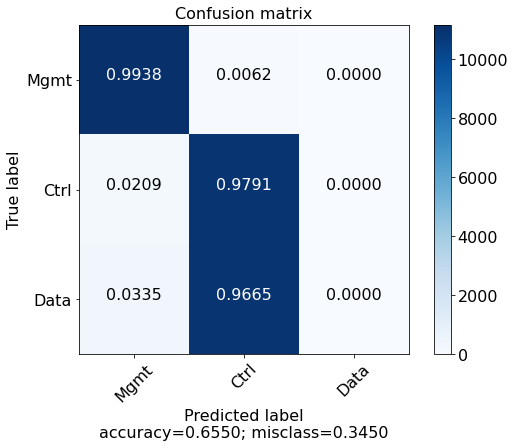

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 100, 1) (33820, 2, 100, 1) (33821, 2, 100, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7451
Epoch 00001: val_loss improved from inf to 0.44182, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 9ms/step - loss: 0.5348 - accuracy: 0.7451 - val_loss: 0.4418 - val_accuracy: 0.8268
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.7912
Epoch 00002: val_loss improved from 0.44182 to 0.41977, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 9ms/step - loss: 0.4732 - accuracy: 0.7912 - val_loss: 0.4198 - val_accuracy: 0.8359


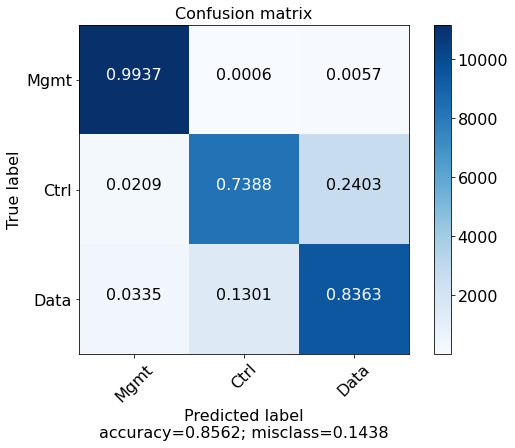

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.8236
Epoch 00001: val_loss improved from inf to 0.45628, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 68s 14ms/step - loss: 0.4291 - accuracy: 0.8236 - val_loss: 0.4563 - val_accuracy: 0.8145
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.8431
Epoch 00002: val_loss did not improve from 0.45628
4933/4933 [==============================] - 67s 13ms/step - loss: 0.3965 - accuracy: 0.8431 - val_loss: 0.5361 - val_accuracy: 0.7394
Epoch 3/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8463
E

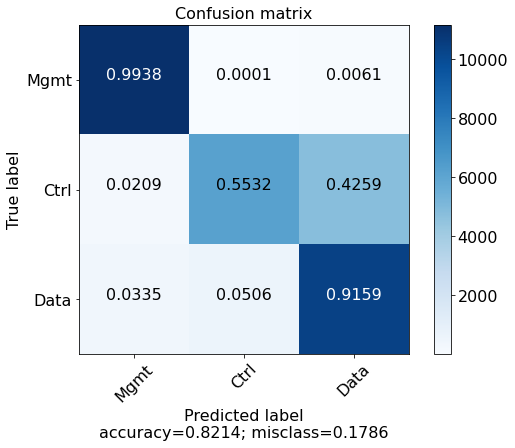

This is experiment:  2  with  100 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 100, 2) (33820, 100, 2) (33821, 100, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6290 - accuracy: 0.6307
Epoch 00001: val_loss improved from inf to 0.55948, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 88s 18ms/step - loss: 0.6290 - accuracy: 0.6306 - val_loss: 0.5595 - val_accuracy: 0.6520
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.5753 - accuracy: 0.6489
Epoch 00002: val_loss improved from 0.55948 to 0.55679, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 86s 17ms/step - loss: 0.5752 - accu

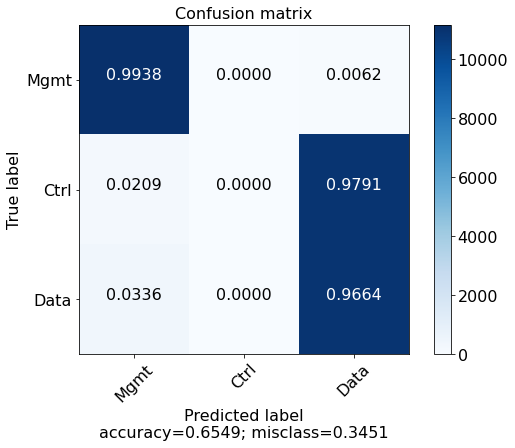

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 100, 1) (33820, 2, 100, 1) (33821, 2, 100, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5301 - accuracy: 0.7486
Epoch 00001: val_loss improved from inf to 0.45635, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 9ms/step - loss: 0.5301 - accuracy: 0.7486 - val_loss: 0.4563 - val_accuracy: 0.7998
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.7892
Epoch 00002: val_loss improved from 0.45635 to 0.42688, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 43s 9ms/step - loss: 0.4750 - accuracy: 0.7892 - val_loss: 0.4269 - val_accuracy: 0.8264


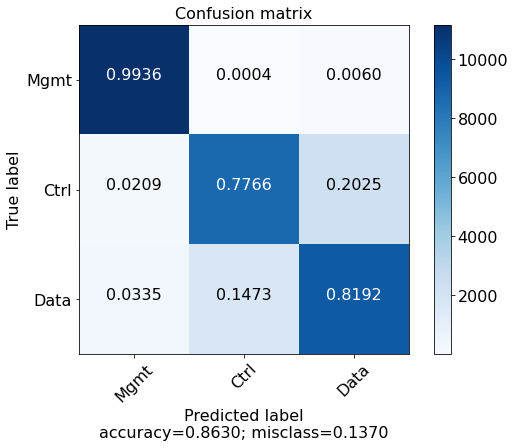

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.8207
Epoch 00001: val_loss improved from inf to 0.45133, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 67s 14ms/step - loss: 0.4310 - accuracy: 0.8207 - val_loss: 0.4513 - val_accuracy: 0.8032
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.8429
Epoch 00002: val_loss did not improve from 0.45133
4933/4933 [==============================] - 65s 13ms/step - loss: 0.3957 - accuracy: 0.8429 - val_loss: 0.4907 - val_accuracy: 0.7828
Epoch 3/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.8464
E

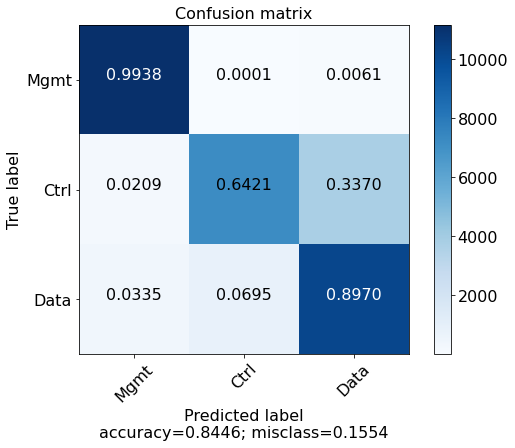

This is experiment:  3  with  100 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 100, 2) (33820, 100, 2) (33821, 100, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6574 - accuracy: 0.6181
Epoch 00001: val_loss improved from inf to 0.56028, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 88s 18ms/step - loss: 0.6574 - accuracy: 0.6181 - val_loss: 0.5603 - val_accuracy: 0.6526
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5779 - accuracy: 0.6502
Epoch 00002: val_loss improved from 0.56028 to 0.55742, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 88s 18ms/step - loss: 0.5779 - accu

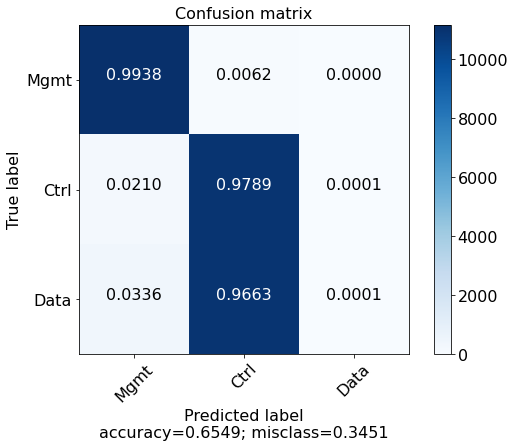

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 100, 1) (33820, 2, 100, 1) (33821, 2, 100, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7440
Epoch 00001: val_loss improved from inf to 0.47515, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 8ms/step - loss: 0.5351 - accuracy: 0.7441 - val_loss: 0.4752 - val_accuracy: 0.7767
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.7899
Epoch 00002: val_loss improved from 0.47515 to 0.43822, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 8ms/step - loss: 0.4749 - accuracy: 0.7899 - val_loss: 0.4382 - val_accuracy: 0.8175


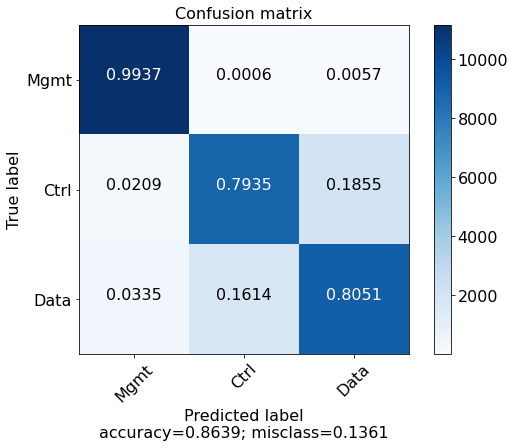

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.4298 - accuracy: 0.8234
Epoch 00001: val_loss improved from inf to 0.48503, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 67s 14ms/step - loss: 0.4298 - accuracy: 0.8234 - val_loss: 0.4850 - val_accuracy: 0.7682
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.3985 - accuracy: 0.8422
Epoch 00002: val_loss did not improve from 0.48503
4933/4933 [==============================] - 66s 13ms/step - loss: 0.3984 - accuracy: 0.8422 - val_loss: 0.5387 - val_accuracy: 0.7482
Epoch 3/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.3872 - accuracy: 0.8473
E

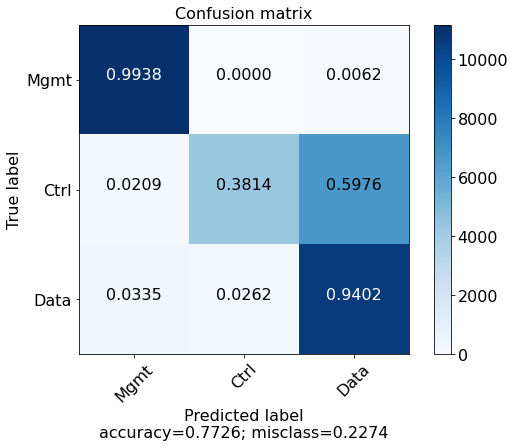

This is experiment:  4  with  100 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 100, 2) (33820, 100, 2) (33821, 100, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6393 - accuracy: 0.6277
Epoch 00001: val_loss improved from inf to 0.56236, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 88s 18ms/step - loss: 0.6393 - accuracy: 0.6277 - val_loss: 0.5624 - val_accuracy: 0.6523
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5741 - accuracy: 0.6501
Epoch 00002: val_loss improved from 0.56236 to 0.56155, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 88s 18ms/step - loss: 0.5742 - accu

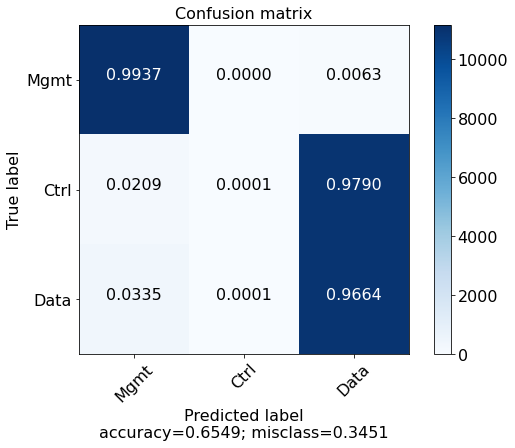

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 100, 1) (33820, 2, 100, 1) (33821, 2, 100, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7471
Epoch 00001: val_loss improved from inf to 0.46491, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 42s 8ms/step - loss: 0.5331 - accuracy: 0.7471 - val_loss: 0.4649 - val_accuracy: 0.7941
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.7902
Epoch 00002: val_loss improved from 0.46491 to 0.41915, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.4764 - accuracy: 0.7902 - val_loss: 0.4192 - val_accuracy: 0.8436


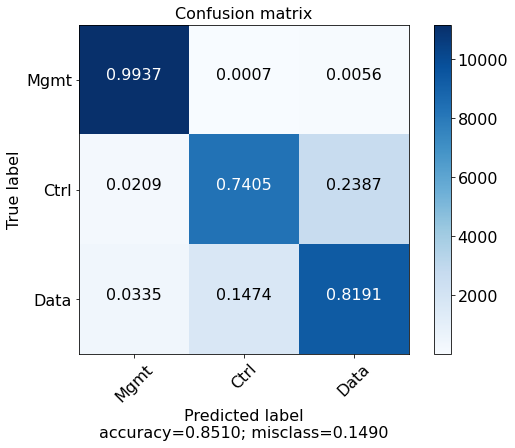

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4305 - accuracy: 0.8233
Epoch 00001: val_loss improved from inf to 0.72366, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4305 - accuracy: 0.8233 - val_loss: 0.7237 - val_accuracy: 0.6844
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.8431
Epoch 00002: val_loss improved from 0.72366 to 0.64197, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 11ms/step - loss: 0.3963 - accuracy: 0.8431 - val_loss: 0.6420

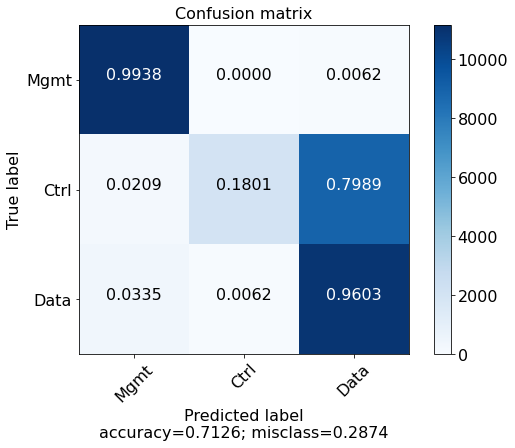

This is experiment:  5  with  100 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 100, 2) (33820, 100, 2) (33821, 100, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.6335
Epoch 00001: val_loss improved from inf to 0.56114, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 65s 13ms/step - loss: 0.6245 - accuracy: 0.6335 - val_loss: 0.5611 - val_accuracy: 0.6524
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5740 - accuracy: 0.6533
Epoch 00002: val_loss improved from 0.56114 to 0.55666, saving model to ./270720084326_iq_samples_100_LSTM_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 64s 13ms/step - loss: 0.5740 - accu

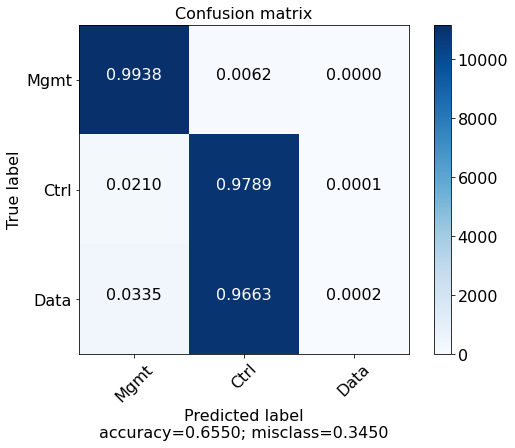

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 100, 1) (33820, 2, 100, 1) (33821, 2, 100, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7479
Epoch 00001: val_loss improved from inf to 0.45606, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.5317 - accuracy: 0.7479 - val_loss: 0.4561 - val_accuracy: 0.8246
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.4783 - accuracy: 0.7886
Epoch 00002: val_loss improved from 0.45606 to 0.44859, saving model to ./270720084326_iq_samples_100_CNN_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.4783 - accuracy: 0.7886 - val_loss: 0.4486 - val_accuracy: 0.8217


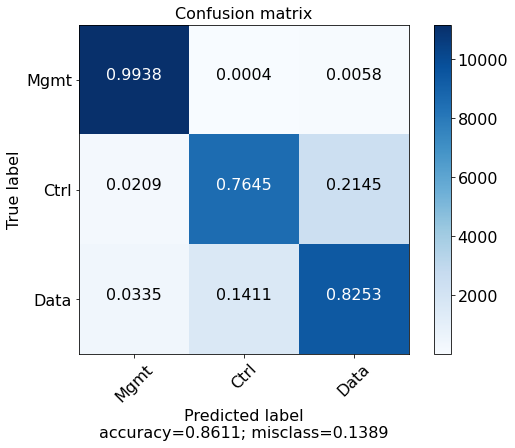

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 100) (33820, 2, 100) (33821, 2, 100)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.4327 - accuracy: 0.8224
Epoch 00001: val_loss improved from inf to 0.62404, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4327 - accuracy: 0.8224 - val_loss: 0.6240 - val_accuracy: 0.7235
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8419
Epoch 00002: val_loss improved from 0.62404 to 0.55189, saving model to ./270720084326_iq_samples_100_Wavenet_iq_samples_100_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 11ms/step - loss: 0.3992 - accuracy: 0.8419 - val_loss: 0.5519

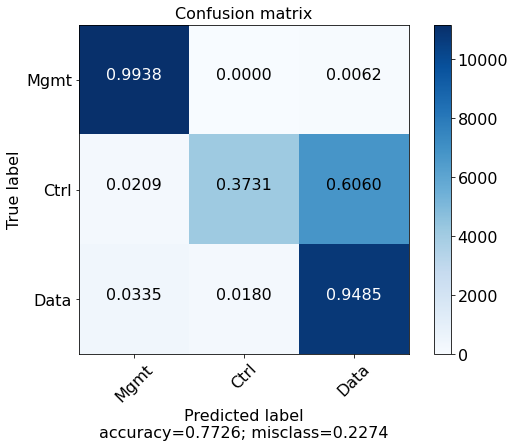

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}]}, 'CNN': {1

  0%|          | 443/225468 [00:00<00:53, 4187.05it/s]

Padding/Truncating sequence  300


100%|██████████| 225468/225468 [03:57<00:00, 950.54it/s] 


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
This is experiment:  1  with  300 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 300, 2) (33820, 300, 2) (33821, 300, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6412 - accuracy: 0.6252
Epoch 00001: val_loss improved from inf to 0.56263, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 160s 33ms/step - loss: 0.6412 - accuracy: 0.6252 - val_loss: 0.5626 - val_accuracy: 0.6506
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.6493
Epoch 00002: val_loss improved from 0.56263 

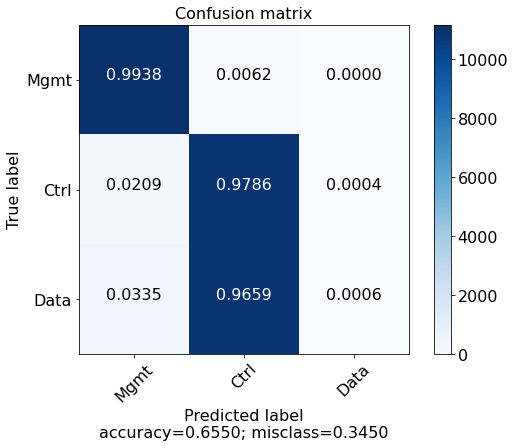

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 300, 1) (33820, 2, 300, 1) (33821, 2, 300, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5134 - accuracy: 0.7607
Epoch 00001: val_loss improved from inf to 0.42634, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.5134 - accuracy: 0.7607 - val_loss: 0.4263 - val_accuracy: 0.8322
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.8096
Epoch 00002: val_loss improved from 0.42634 to 0.40294, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.4503 - accuracy: 0.8096 - val_loss: 0.4029 - val_accuracy: 0.8458


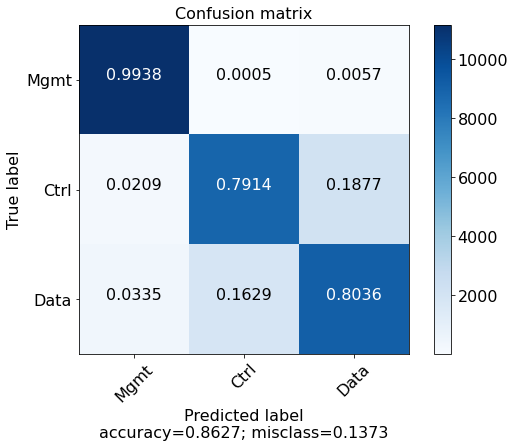

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8285
Epoch 00001: val_loss improved from inf to 0.49797, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 59s 12ms/step - loss: 0.4239 - accuracy: 0.8285 - val_loss: 0.4980 - val_accuracy: 0.7735
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8426
Epoch 00002: val_loss did not improve from 0.49797
4933/4933 [==============================] - 56s 11ms/step - loss: 0.3964 - accuracy: 0.8426 - val_loss: 0.5494 - val_accuracy: 0.7799
Epoch 3/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.3861 - accuracy: 0.8477
E

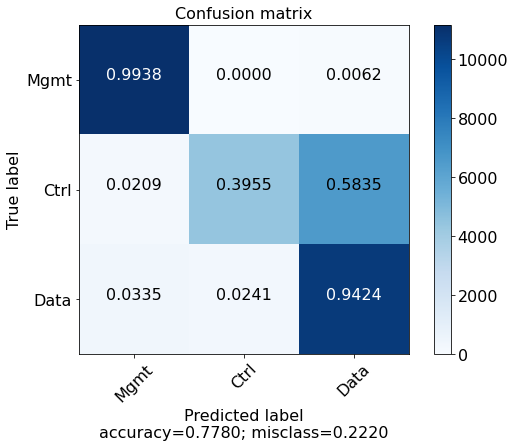

This is experiment:  2  with  300 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 300, 2) (33820, 300, 2) (33821, 300, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.6394 - accuracy: 0.6247
Epoch 00001: val_loss improved from inf to 0.56495, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 149s 30ms/step - loss: 0.6394 - accuracy: 0.6247 - val_loss: 0.5650 - val_accuracy: 0.6504
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5687 - accuracy: 0.6525
Epoch 00002: val_loss improved from 0.56495 to 0.56088, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 146s 30ms/step - loss: 0.5687 - ac

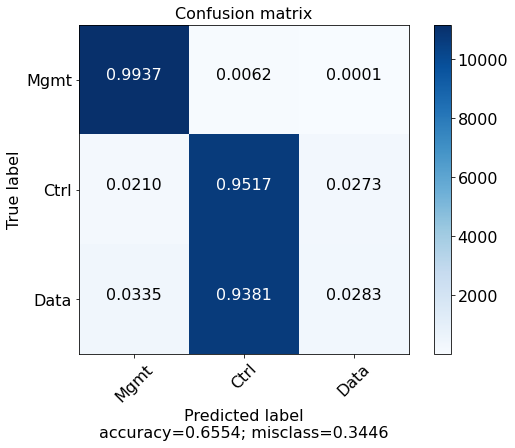

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 300, 1) (33820, 2, 300, 1) (33821, 2, 300, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.5153 - accuracy: 0.7601
Epoch 00001: val_loss improved from inf to 0.42489, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.5152 - accuracy: 0.7601 - val_loss: 0.4249 - val_accuracy: 0.8308
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.8106
Epoch 00002: val_loss improved from 0.42489 to 0.40178, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.4500 - accuracy: 0.8106 - val_loss: 0.4018 - val_accuracy: 0.8493


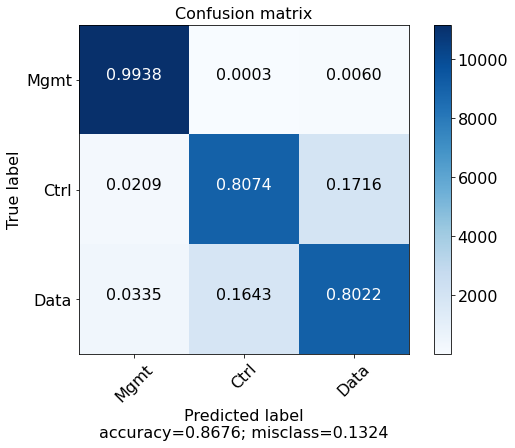

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8279
Epoch 00001: val_loss improved from inf to 0.67135, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4251 - accuracy: 0.8279 - val_loss: 0.6713 - val_accuracy: 0.6948
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8439
Epoch 00002: val_loss improved from 0.67135 to 0.39015, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 56s 11ms/step - loss: 0.3939 - accuracy: 0.8439 - val_loss: 0.3902

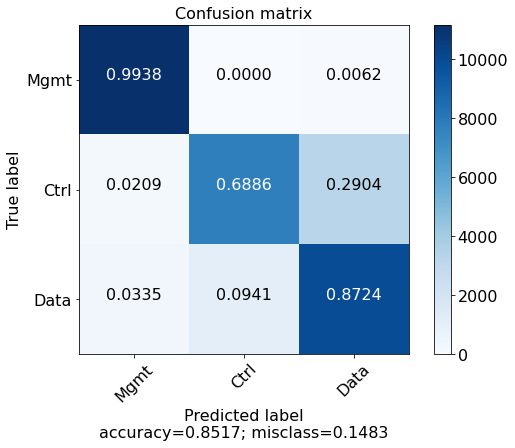

This is experiment:  3  with  300 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 300, 2) (33820, 300, 2) (33821, 300, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6422 - accuracy: 0.6271
Epoch 00001: val_loss improved from inf to 0.55927, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 144s 29ms/step - loss: 0.6422 - accuracy: 0.6271 - val_loss: 0.5593 - val_accuracy: 0.6533
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.6487
Epoch 00002: val_loss improved from 0.55927 to 0.55687, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 143s 29ms/step - loss: 0.5792 - ac

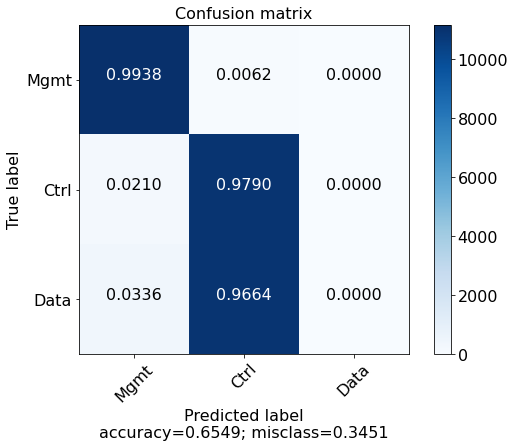

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 300, 1) (33820, 2, 300, 1) (33821, 2, 300, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5090 - accuracy: 0.7678
Epoch 00001: val_loss improved from inf to 0.42167, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 7ms/step - loss: 0.5090 - accuracy: 0.7678 - val_loss: 0.4217 - val_accuracy: 0.8411
Epoch 2/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.4491 - accuracy: 0.8098
Epoch 00002: val_loss improved from 0.42167 to 0.39971, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.4490 - accuracy: 0.8098 - val_loss: 0.3997 - val_accuracy: 0.8511


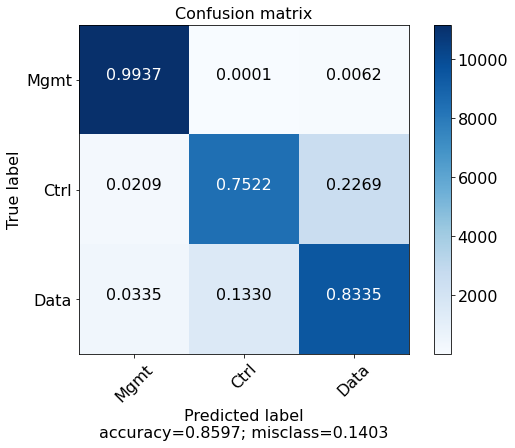

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8273
Epoch 00001: val_loss improved from inf to 0.46381, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4251 - accuracy: 0.8273 - val_loss: 0.4638 - val_accuracy: 0.8116
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.3944 - accuracy: 0.8441
Epoch 00002: val_loss did not improve from 0.46381
4933/4933 [==============================] - 56s 11ms/step - loss: 0.3945 - accuracy: 0.8440 - val_loss: 0.7329 - val_accuracy: 0.7070
Epoch 3/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8463
E

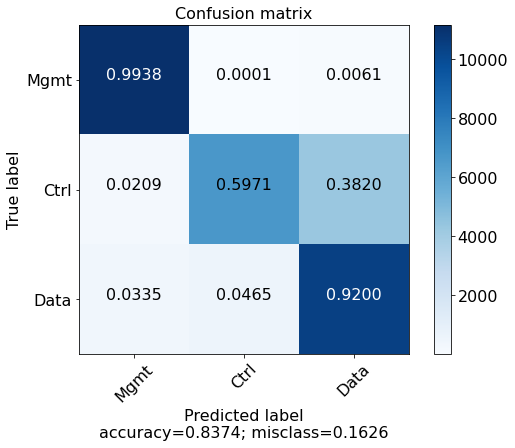

This is experiment:  4  with  300 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 300, 2) (33820, 300, 2) (33821, 300, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6310 - accuracy: 0.6290
Epoch 00001: val_loss improved from inf to 0.55720, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 145s 29ms/step - loss: 0.6310 - accuracy: 0.6290 - val_loss: 0.5572 - val_accuracy: 0.6514
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.6514
Epoch 00002: val_loss improved from 0.55720 to 0.55587, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 142s 29ms/step - loss: 0.5735 - ac

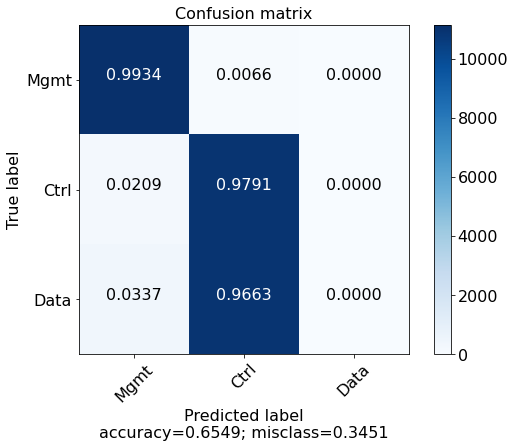

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 300, 1) (33820, 2, 300, 1) (33821, 2, 300, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.7622
Epoch 00001: val_loss improved from inf to 0.42749, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.5123 - accuracy: 0.7622 - val_loss: 0.4275 - val_accuracy: 0.8352
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.4513 - accuracy: 0.8096
Epoch 00002: val_loss improved from 0.42749 to 0.41411, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.4512 - accuracy: 0.8095 - val_loss: 0.4141 - val_accuracy: 0.8381


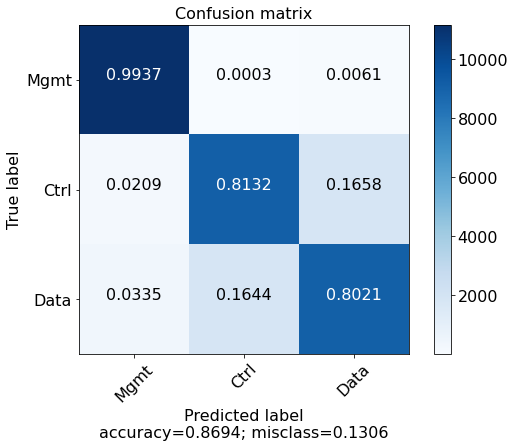

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8245
Epoch 00001: val_loss improved from inf to 0.64695, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4275 - accuracy: 0.8246 - val_loss: 0.6470 - val_accuracy: 0.7256
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8447
Epoch 00002: val_loss improved from 0.64695 to 0.43759, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 56s 11ms/step - loss: 0.3942 - accuracy: 0.8447 - val_loss: 0.4376

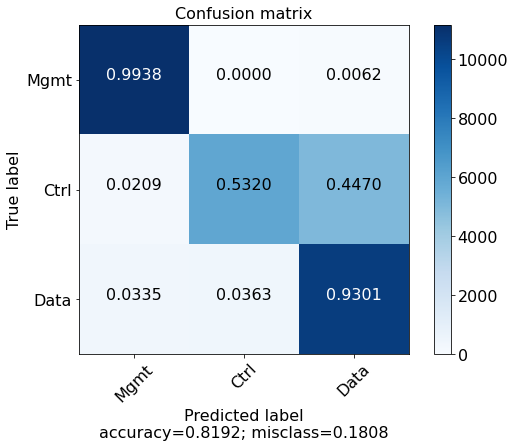

This is experiment:  5  with  300 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 300, 2) (33820, 300, 2) (33821, 300, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.6256
Epoch 00001: val_loss improved from inf to 0.56181, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 146s 30ms/step - loss: 0.6418 - accuracy: 0.6256 - val_loss: 0.5618 - val_accuracy: 0.6520
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.6519
Epoch 00002: val_loss improved from 0.56181 to 0.55626, saving model to ./270720084326_iq_samples_300_LSTM_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 144s 29ms/step - loss: 0.5709 - ac

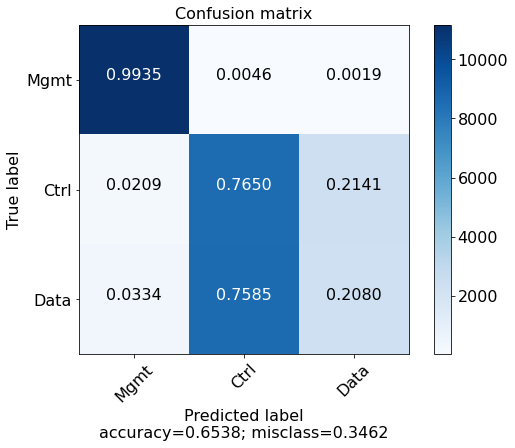

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 300, 1) (33820, 2, 300, 1) (33821, 2, 300, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.5089 - accuracy: 0.7635
Epoch 00001: val_loss improved from inf to 0.43026, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 35s 7ms/step - loss: 0.5089 - accuracy: 0.7635 - val_loss: 0.4303 - val_accuracy: 0.8290
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.4516 - accuracy: 0.8094
Epoch 00002: val_loss improved from 0.43026 to 0.41295, saving model to ./270720084326_iq_samples_300_CNN_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 35s 7ms/step - loss: 0.4516 - accuracy: 0.8094 - val_loss: 0.4130 - val_accuracy: 0.8481


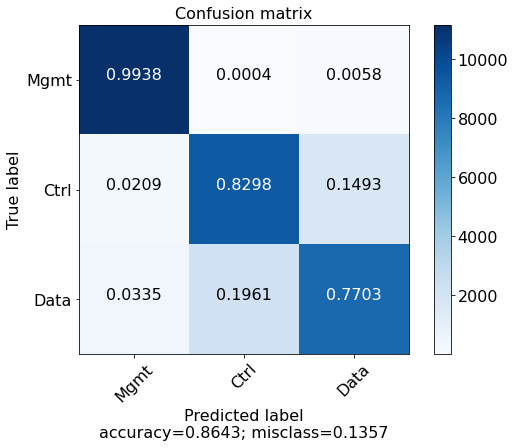

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 300) (33820, 2, 300) (33821, 2, 300)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.8223
Epoch 00001: val_loss improved from inf to 0.59707, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.4284 - accuracy: 0.8223 - val_loss: 0.5971 - val_accuracy: 0.7735
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.3954 - accuracy: 0.8441
Epoch 00002: val_loss improved from 0.59707 to 0.46289, saving model to ./270720084326_iq_samples_300_Wavenet_iq_samples_300_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.3954 - accuracy: 0.8441 - val_loss: 0.4629

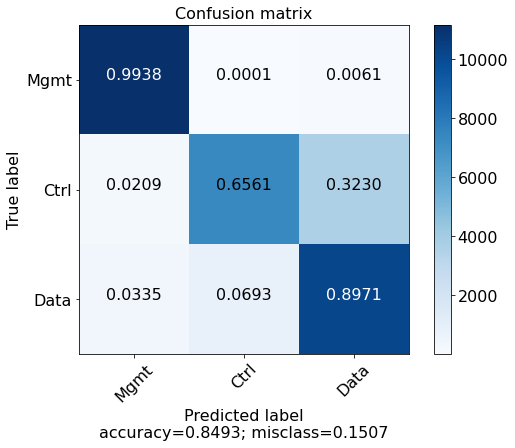

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

  0%|          | 440/225468 [00:00<01:04, 3478.55it/s]

Padding/Truncating sequence  500


100%|██████████| 225468/225468 [00:46<00:00, 4856.92it/s] 


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
This is experiment:  1  with  500 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 500, 2) (33820, 500, 2) (33821, 500, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5680 - accuracy: 0.7666
Epoch 00001: val_loss improved from inf to 0.32188, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 233s 47ms/step - loss: 0.5680 - accuracy: 0.7666 - val_loss: 0.3219 - val_accuracy: 0.8845
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8748
Epoch 00002: val_loss improved from 0.32188 

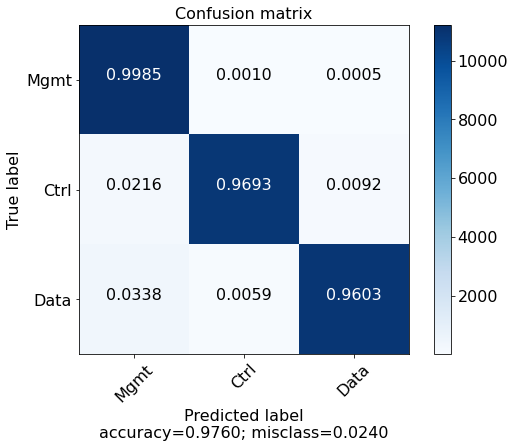

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 500, 1) (33820, 2, 500, 1) (33821, 2, 500, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1361 - accuracy: 0.9676
Epoch 00001: val_loss improved from inf to 0.10072, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 7ms/step - loss: 0.1361 - accuracy: 0.9676 - val_loss: 0.1007 - val_accuracy: 0.9789
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.1007 - accuracy: 0.9781
Epoch 00002: val_loss improved from 0.10072 to 0.09472, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1007 - accuracy: 0.9781 - val_loss: 0.0947 - val_accuracy: 0.9796


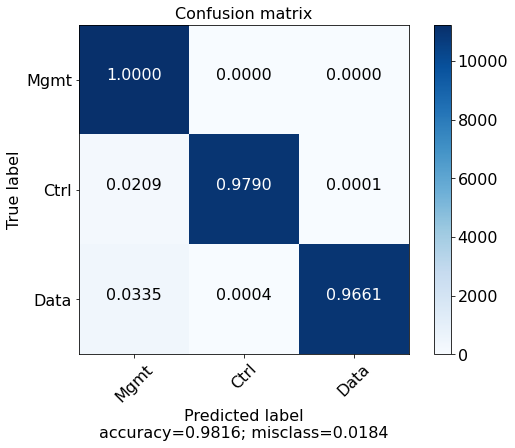

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1533 - accuracy: 0.9539
Epoch 00001: val_loss improved from inf to 0.09475, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 59s 12ms/step - loss: 0.1533 - accuracy: 0.9539 - val_loss: 0.0947 - val_accuracy: 0.9787
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9795
Epoch 00002: val_loss improved from 0.09475 to 0.09289, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.0926 - accuracy: 0.9795 - val_loss: 0.0929

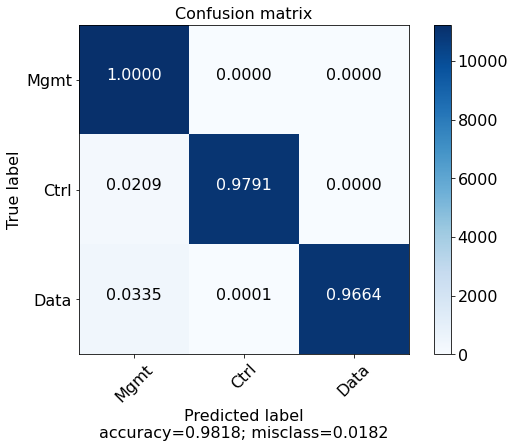

This is experiment:  2  with  500 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 500, 2) (33820, 500, 2) (33821, 500, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5389 - accuracy: 0.7807
Epoch 00001: val_loss improved from inf to 0.29370, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 245s 50ms/step - loss: 0.5389 - accuracy: 0.7807 - val_loss: 0.2937 - val_accuracy: 0.8992
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8749
Epoch 00002: val_loss improved from 0.29370 to 0.21433, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 243s 49ms/step - loss: 0.3431 - ac

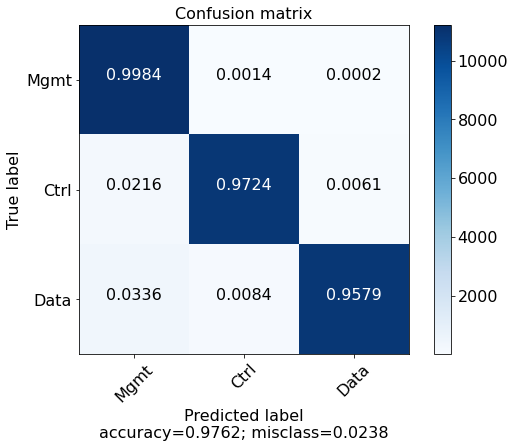

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 500, 1) (33820, 2, 500, 1) (33821, 2, 500, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9681
Epoch 00001: val_loss improved from inf to 0.09713, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1336 - accuracy: 0.9681 - val_loss: 0.0971 - val_accuracy: 0.9792
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.1002 - accuracy: 0.9780
Epoch 00002: val_loss improved from 0.09713 to 0.09356, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1002 - accuracy: 0.9780 - val_loss: 0.0936 - val_accuracy: 0.9795


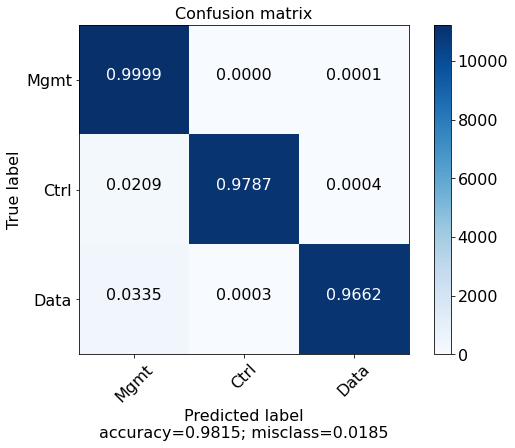

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9530
Epoch 00001: val_loss improved from inf to 0.09192, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 58s 12ms/step - loss: 0.1495 - accuracy: 0.9530 - val_loss: 0.0919 - val_accuracy: 0.9795
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9799
Epoch 00002: val_loss improved from 0.09192 to 0.09176, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.0911 - accuracy: 0.9799 - val_loss: 0.0918

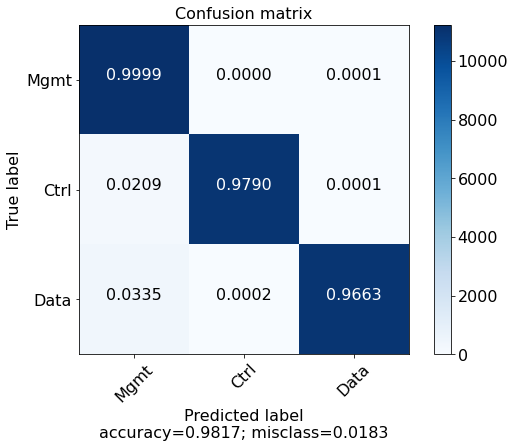

This is experiment:  3  with  500 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 500, 2) (33820, 500, 2) (33821, 500, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.6285 - accuracy: 0.7233
Epoch 00001: val_loss improved from inf to 0.36235, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 244s 50ms/step - loss: 0.6285 - accuracy: 0.7233 - val_loss: 0.3623 - val_accuracy: 0.8708
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8714
Epoch 00002: val_loss improved from 0.36235 to 0.21158, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 243s 49ms/step - loss: 0.3515 - ac

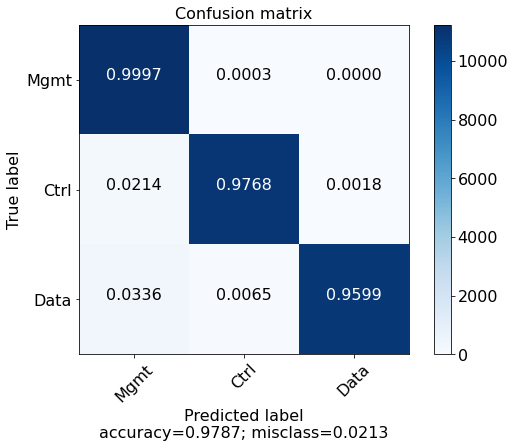

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 500, 1) (33820, 2, 500, 1) (33821, 2, 500, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9685
Epoch 00001: val_loss improved from inf to 0.09939, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1334 - accuracy: 0.9685 - val_loss: 0.0994 - val_accuracy: 0.9789
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9779
Epoch 00002: val_loss improved from 0.09939 to 0.09544, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1008 - accuracy: 0.9779 - val_loss: 0.0954 - val_accuracy: 0.9796


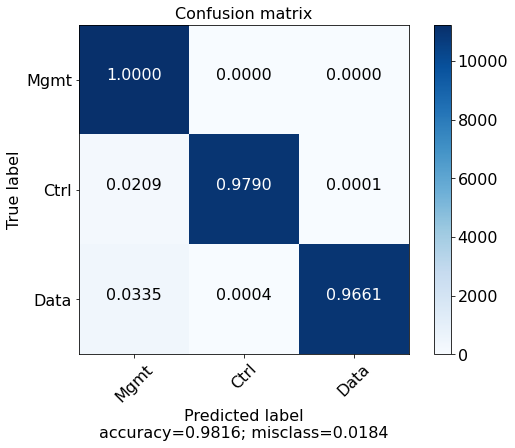

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.1266 - accuracy: 0.9655
Epoch 00001: val_loss improved from inf to 0.09355, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 61s 12ms/step - loss: 0.1265 - accuracy: 0.9655 - val_loss: 0.0935 - val_accuracy: 0.9793
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0916 - accuracy: 0.9797
Epoch 00002: val_loss improved from 0.09355 to 0.09132, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 59s 12ms/step - loss: 0.0916 - accuracy: 0.9797 - val_loss: 0.0913

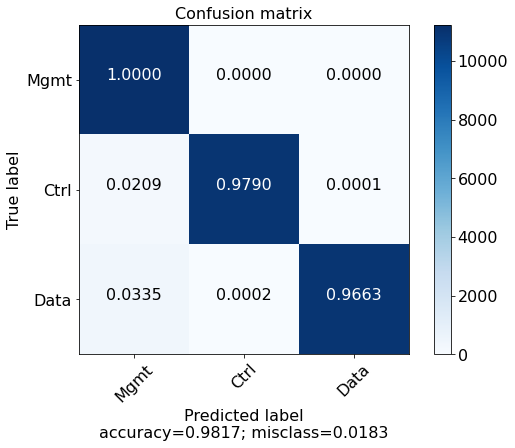

This is experiment:  4  with  500 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 500, 2) (33820, 500, 2) (33821, 500, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7835
Epoch 00001: val_loss improved from inf to 0.47143, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 241s 49ms/step - loss: 0.5312 - accuracy: 0.7835 - val_loss: 0.4714 - val_accuracy: 0.8188
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8873
Epoch 00002: val_loss improved from 0.47143 to 0.26275, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 239s 48ms/step - loss: 0.3179 - ac

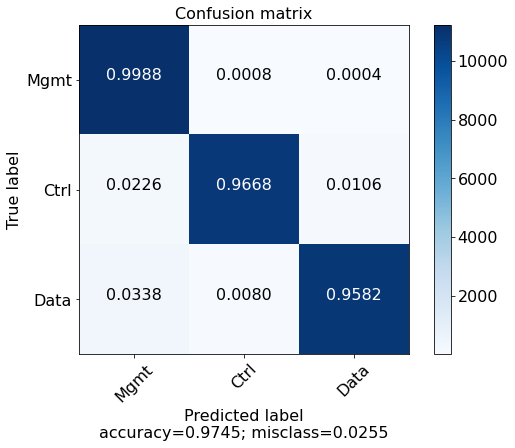

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 500, 1) (33820, 2, 500, 1) (33821, 2, 500, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4926/4933 [============================>.] - ETA: 0s - loss: 0.1367 - accuracy: 0.9673
Epoch 00001: val_loss improved from inf to 0.10082, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1366 - accuracy: 0.9674 - val_loss: 0.1008 - val_accuracy: 0.9790
Epoch 2/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.1019 - accuracy: 0.9778
Epoch 00002: val_loss improved from 0.10082 to 0.09329, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1018 - accuracy: 0.9778 - val_loss: 0.0933 - val_accuracy: 0.9794


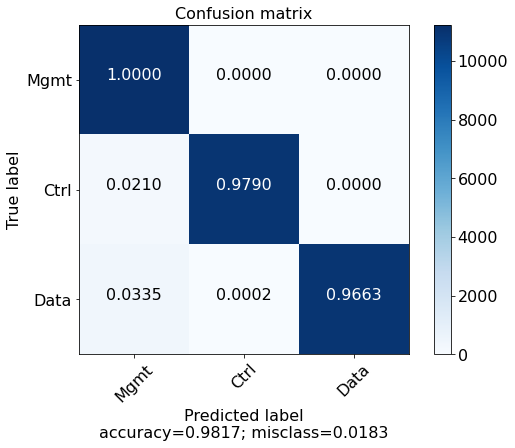

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1542 - accuracy: 0.9535
Epoch 00001: val_loss improved from inf to 0.09467, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 58s 12ms/step - loss: 0.1542 - accuracy: 0.9535 - val_loss: 0.0947 - val_accuracy: 0.9788
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0932 - accuracy: 0.9793
Epoch 00002: val_loss improved from 0.09467 to 0.09240, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 56s 11ms/step - loss: 0.0932 - accuracy: 0.9793 - val_loss: 0.0924

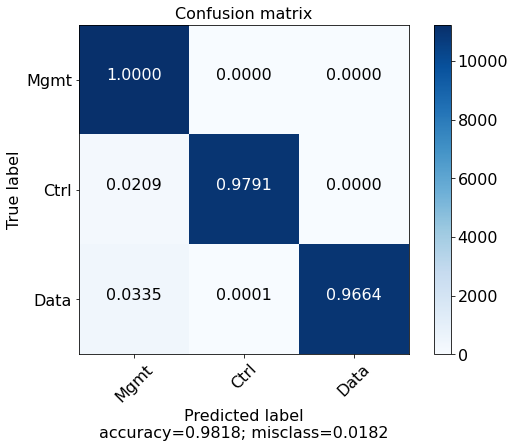

This is experiment:  5  with  500 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 500, 2) (33820, 500, 2) (33821, 500, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.5968 - accuracy: 0.7506
Epoch 00001: val_loss improved from inf to 0.31803, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 239s 48ms/step - loss: 0.5968 - accuracy: 0.7507 - val_loss: 0.3180 - val_accuracy: 0.8878
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8722
Epoch 00002: val_loss improved from 0.31803 to 0.20199, saving model to ./270720084326_iq_samples_500_LSTM_iq_samples_500_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 239s 49ms/step - loss: 0.3474 - ac

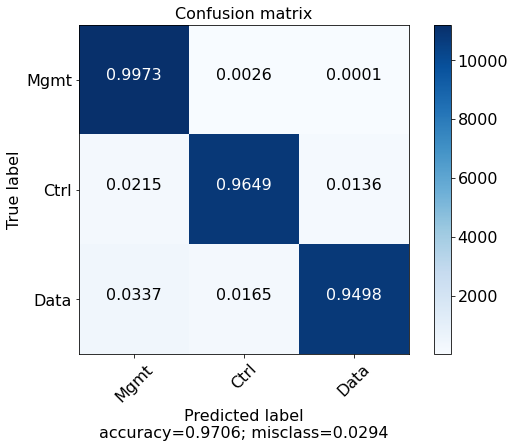

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 500, 1) (33820, 2, 500, 1) (33821, 2, 500, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4926/4933 [============================>.] - ETA: 0s - loss: 0.1378 - accuracy: 0.9671
Epoch 00001: val_loss improved from inf to 0.09883, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1377 - accuracy: 0.9672 - val_loss: 0.0988 - val_accuracy: 0.9784
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1004 - accuracy: 0.9781
Epoch 00002: val_loss improved from 0.09883 to 0.09495, saving model to ./270720084326_iq_samples_500_CNN_iq_samples_500_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1004 - accuracy: 0.9781 - val_loss: 0.0950 - val_accuracy: 0.9795


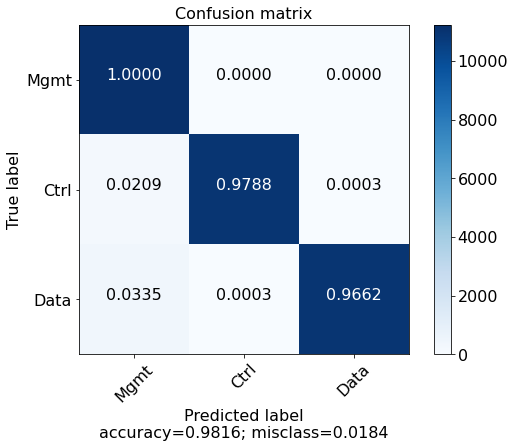

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 500) (33820, 2, 500) (33821, 2, 500)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.1232 - accuracy: 0.9666
Epoch 00001: val_loss improved from inf to 0.09138, saving model to ./270720084326_iq_samples_500_Wavenet_iq_samples_500_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 57s 12ms/step - loss: 0.1232 - accuracy: 0.9667 - val_loss: 0.0914 - val_accuracy: 0.9796
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9800
Epoch 00002: val_loss did not improve from 0.09138
4933/4933 [==============================] - 57s 12ms/step - loss: 0.0908 - accuracy: 0.9800 - val_loss: 0.0934 - val_accuracy: 0.9797
Epoch 3/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9803
E

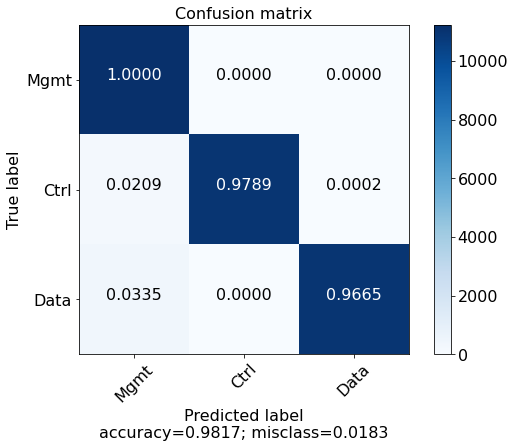

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

  0%|          | 886/225468 [00:00<00:25, 8858.00it/s]

Padding/Truncating sequence  700


100%|██████████| 225468/225468 [00:12<00:00, 18034.35it/s]


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
This is experiment:  1  with  700 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 700, 2) (33820, 700, 2) (33821, 700, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.9151
Epoch 00001: val_loss improved from inf to 0.14580, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 339s 69ms/step - loss: 0.2539 - accuracy: 0.9151 - val_loss: 0.1458 - val_accuracy: 0.9587
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1734 - accuracy: 0.9489
Epoch 00002: val_loss improved from 0.14580 

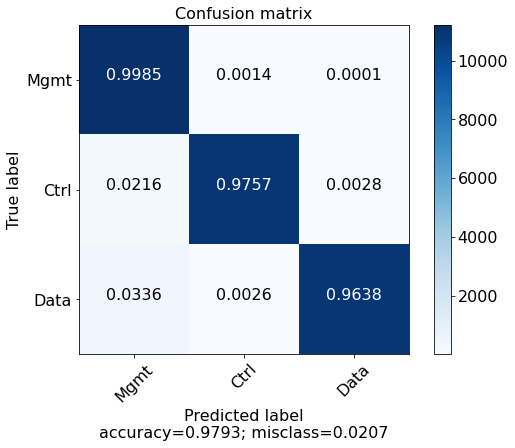

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 700, 1) (33820, 2, 700, 1) (33821, 2, 700, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9730
Epoch 00001: val_loss improved from inf to 0.09897, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 7ms/step - loss: 0.1240 - accuracy: 0.9730 - val_loss: 0.0990 - val_accuracy: 0.9790
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.0972 - accuracy: 0.9792
Epoch 00002: val_loss improved from 0.09897 to 0.09372, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.0973 - accuracy: 0.9792 - val_loss: 0.0937 - val_accuracy: 0.9795


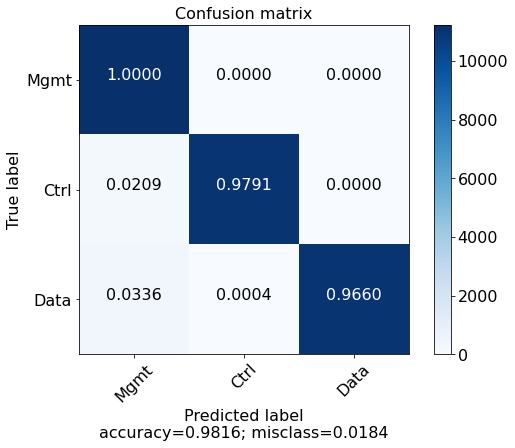

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9733
Epoch 00001: val_loss improved from inf to 0.09208, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 62s 12ms/step - loss: 0.1087 - accuracy: 0.9733 - val_loss: 0.0921 - val_accuracy: 0.9795
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0903 - accuracy: 0.9803
Epoch 00002: val_loss improved from 0.09208 to 0.09089, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 60s 12ms/step - loss: 0.0903 - accuracy: 0.9803 - val_loss: 0.0909

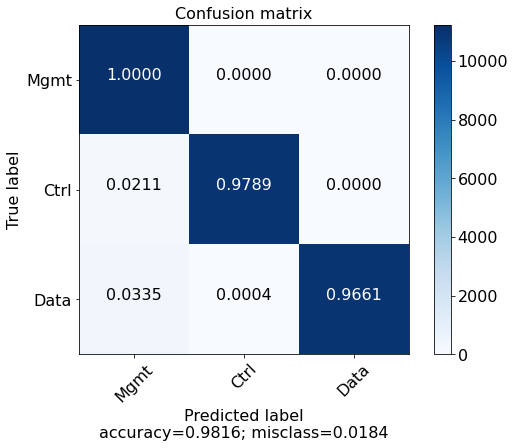

This is experiment:  2  with  700 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 700, 2) (33820, 700, 2) (33821, 700, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9065
Epoch 00001: val_loss improved from inf to 0.15591, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 334s 68ms/step - loss: 0.2748 - accuracy: 0.9065 - val_loss: 0.1559 - val_accuracy: 0.9549
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1950 - accuracy: 0.9406
Epoch 00002: val_loss improved from 0.15591 to 0.12457, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 335s 68ms/step - loss: 0.1951 - ac

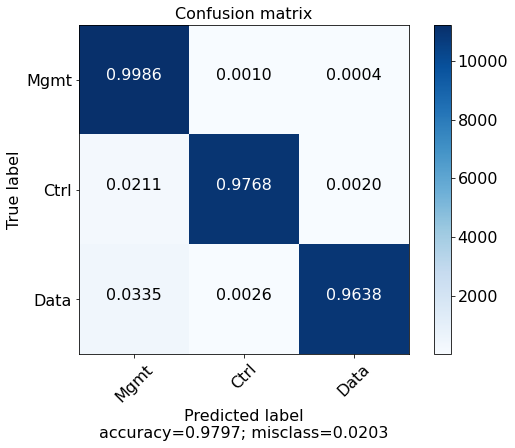

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 700, 1) (33820, 2, 700, 1) (33821, 2, 700, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9714
Epoch 00001: val_loss improved from inf to 0.09962, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1291 - accuracy: 0.9714 - val_loss: 0.0996 - val_accuracy: 0.9794
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9794
Epoch 00002: val_loss improved from 0.09962 to 0.09465, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.0973 - accuracy: 0.9794 - val_loss: 0.0947 - val_accuracy: 0.9796


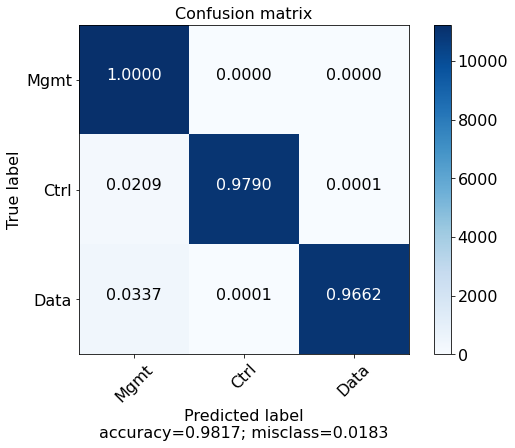

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.1084 - accuracy: 0.9740
Epoch 00001: val_loss improved from inf to 0.09171, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 62s 13ms/step - loss: 0.1084 - accuracy: 0.9740 - val_loss: 0.0917 - val_accuracy: 0.9796
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0909 - accuracy: 0.9801
Epoch 00002: val_loss did not improve from 0.09171
4933/4933 [==============================] - 61s 12ms/step - loss: 0.0909 - accuracy: 0.9801 - val_loss: 0.0987 - val_accuracy: 0.9789
Epoch 3/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0897 - accuracy: 0.9803
E

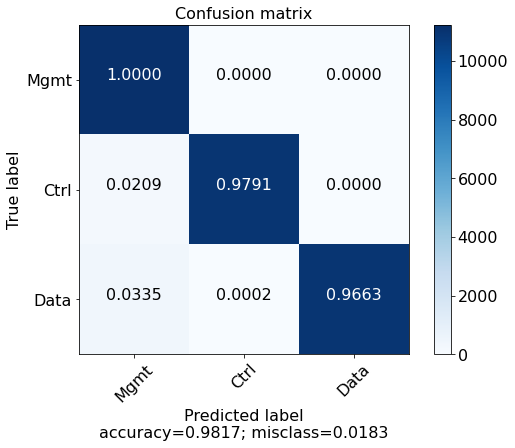

This is experiment:  3  with  700 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 700, 2) (33820, 700, 2) (33821, 700, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.9081
Epoch 00001: val_loss improved from inf to 0.13673, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 345s 70ms/step - loss: 0.2669 - accuracy: 0.9081 - val_loss: 0.1367 - val_accuracy: 0.9639
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9552
Epoch 00002: val_loss improved from 0.13673 to 0.11913, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 343s 70ms/step - loss: 0.1596 - ac

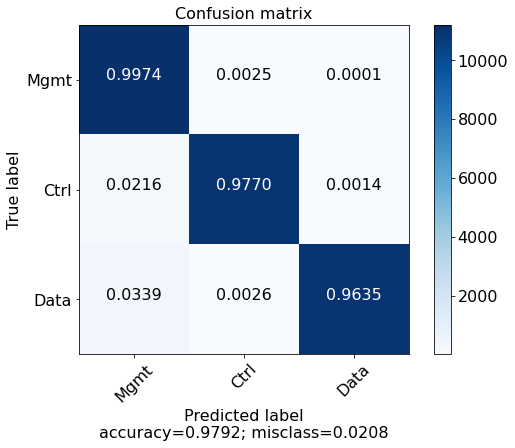

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 700, 1) (33820, 2, 700, 1) (33821, 2, 700, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4926/4933 [============================>.] - ETA: 0s - loss: 0.1276 - accuracy: 0.9728
Epoch 00001: val_loss improved from inf to 0.10135, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 8ms/step - loss: 0.1276 - accuracy: 0.9728 - val_loss: 0.1013 - val_accuracy: 0.9791
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9795
Epoch 00002: val_loss improved from 0.10135 to 0.09301, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 7ms/step - loss: 0.0970 - accuracy: 0.9795 - val_loss: 0.0930 - val_accuracy: 0.9796


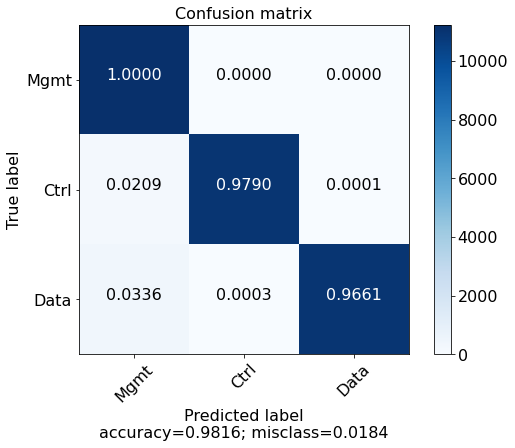

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1110 - accuracy: 0.9724
Epoch 00001: val_loss improved from inf to 0.09263, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 59s 12ms/step - loss: 0.1110 - accuracy: 0.9724 - val_loss: 0.0926 - val_accuracy: 0.9794
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9802
Epoch 00002: val_loss improved from 0.09263 to 0.09198, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 60s 12ms/step - loss: 0.0907 - accuracy: 0.9802 - val_loss: 0.0920

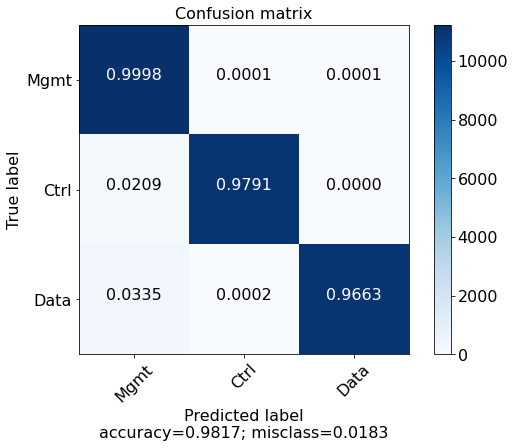

This is experiment:  4  with  700 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 700, 2) (33820, 700, 2) (33821, 700, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2558 - accuracy: 0.9134
Epoch 00001: val_loss improved from inf to 0.14765, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 341s 69ms/step - loss: 0.2558 - accuracy: 0.9134 - val_loss: 0.1476 - val_accuracy: 0.9588
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1641 - accuracy: 0.9535
Epoch 00002: val_loss improved from 0.14765 to 0.11708, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 341s 69ms/step - loss: 0.1641 - ac

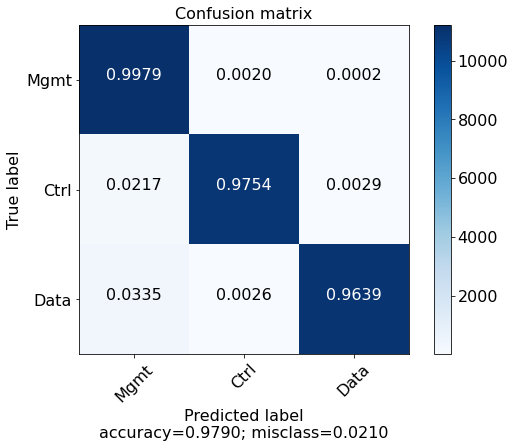

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 700, 1) (33820, 2, 700, 1) (33821, 2, 700, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.9725
Epoch 00001: val_loss improved from inf to 0.09512, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 36s 7ms/step - loss: 0.1247 - accuracy: 0.9725 - val_loss: 0.0951 - val_accuracy: 0.9795
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9794
Epoch 00002: val_loss did not improve from 0.09512
4933/4933 [==============================] - 36s 7ms/step - loss: 0.0970 - accuracy: 0.9794 - val_loss: 0.0954 - val_accuracy: 0.9794
Epoch 3/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9796
Epoch 00003: val_loss

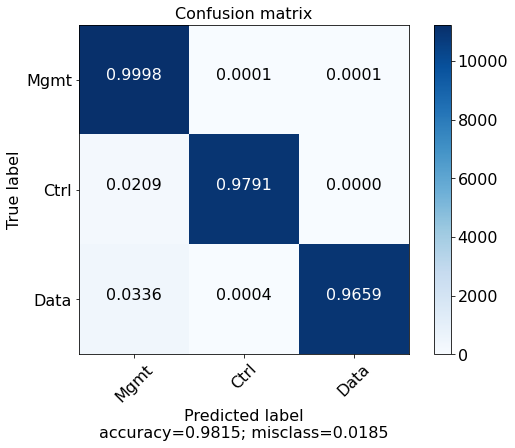

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9746
Epoch 00001: val_loss improved from inf to 0.09145, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 61s 12ms/step - loss: 0.1072 - accuracy: 0.9746 - val_loss: 0.0915 - val_accuracy: 0.9796
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0903 - accuracy: 0.9803
Epoch 00002: val_loss improved from 0.09145 to 0.09073, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 60s 12ms/step - loss: 0.0903 - accuracy: 0.9803 - val_loss: 0.0907

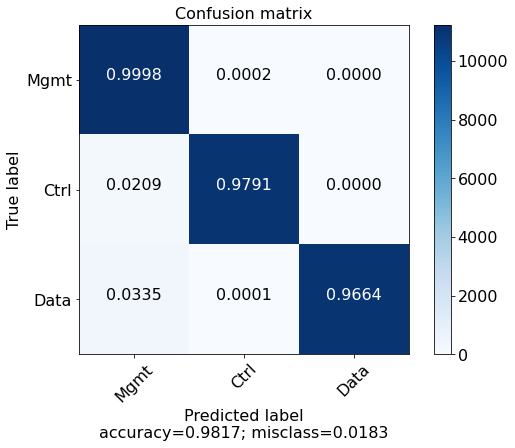

This is experiment:  5  with  700 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 700, 2) (33820, 700, 2) (33821, 700, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2595 - accuracy: 0.9121
Epoch 00001: val_loss improved from inf to 0.12465, saving model to ./270720084326_iq_samples_700_LSTM_iq_samples_700_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 349s 71ms/step - loss: 0.2595 - accuracy: 0.9121 - val_loss: 0.1247 - val_accuracy: 0.9680
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9474
Epoch 00002: val_loss did not improve from 0.12465
4933/4933 [==============================] - 349s 71ms/step - loss: 0.1788 - accuracy: 0.9474 - val_loss: 0.1273 - val_accuracy: 0.9680
Epoch 3/30
4933/4933 [==============================] - ETA: 0s

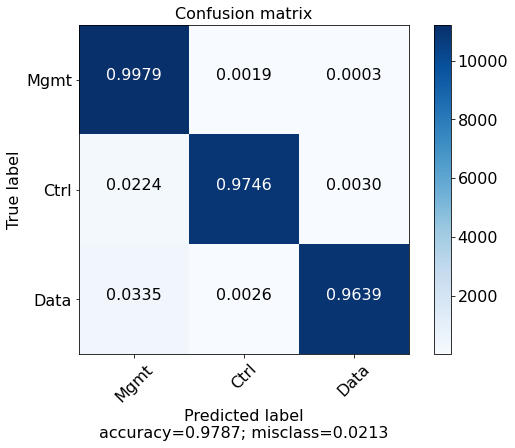

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 700, 1) (33820, 2, 700, 1) (33821, 2, 700, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9733
Epoch 00001: val_loss improved from inf to 0.09719, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 7ms/step - loss: 0.1235 - accuracy: 0.9733 - val_loss: 0.0972 - val_accuracy: 0.9794
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9794
Epoch 00002: val_loss improved from 0.09719 to 0.09391, saving model to ./270720084326_iq_samples_700_CNN_iq_samples_700_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 37s 8ms/step - loss: 0.0970 - accuracy: 0.9794 - val_loss: 0.0939 - val_accuracy: 0.9794


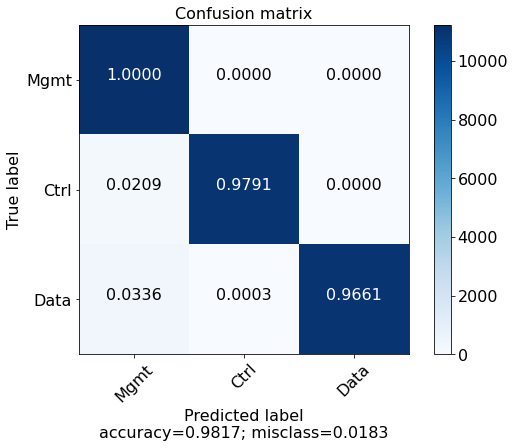

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 700) (33820, 2, 700) (33821, 2, 700)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9712
Epoch 00001: val_loss improved from inf to 0.09522, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 61s 12ms/step - loss: 0.1131 - accuracy: 0.9712 - val_loss: 0.0952 - val_accuracy: 0.9790
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.9800
Epoch 00002: val_loss improved from 0.09522 to 0.09129, saving model to ./270720084326_iq_samples_700_Wavenet_iq_samples_700_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 60s 12ms/step - loss: 0.0914 - accuracy: 0.9800 - val_loss: 0.0913

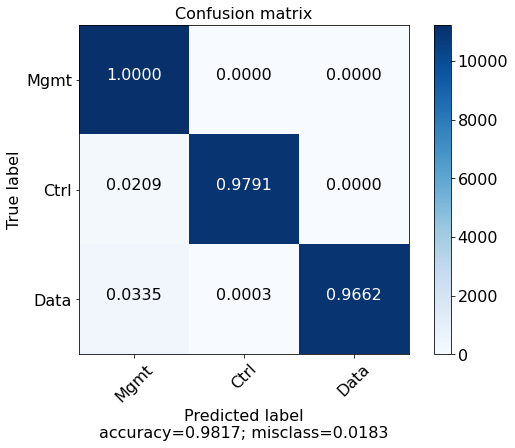

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

  0%|          | 881/225468 [00:00<00:25, 8806.02it/s]

Padding/Truncating sequence  1000


100%|██████████| 225468/225468 [00:13<00:00, 16393.90it/s]


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
This is experiment:  1  with  1000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 1000, 2) (33820, 1000, 2) (33821, 1000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.9059
Epoch 00001: val_loss improved from inf to 0.16467, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 479s 97ms/step - loss: 0.2793 - accuracy: 0.9059 - val_loss: 0.1647 - val_accuracy: 0.9630
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.9432
Epoch 00002: val_loss improved from

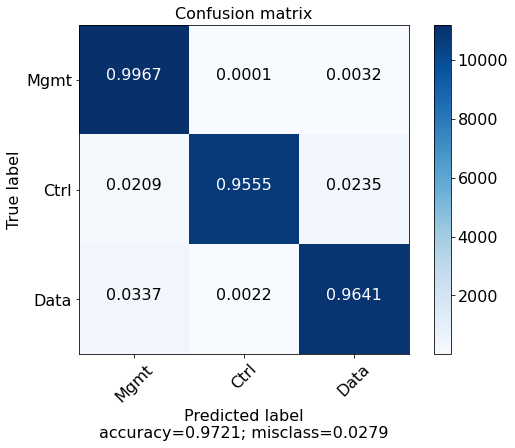

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 1000, 1) (33820, 2, 1000, 1) (33821, 2, 1000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9740
Epoch 00001: val_loss improved from inf to 0.10293, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 39s 8ms/step - loss: 0.1200 - accuracy: 0.9740 - val_loss: 0.1029 - val_accuracy: 0.9792
Epoch 2/30
4926/4933 [============================>.] - ETA: 0s - loss: 0.0965 - accuracy: 0.9795
Epoch 00002: val_loss improved from 0.10293 to 0.09492, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.0965 - accuracy: 0.9795 - val_loss: 0.0949 - val_accuracy: 

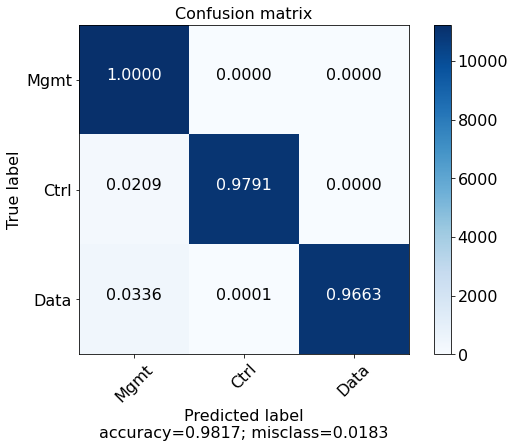

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9749
Epoch 00001: val_loss improved from inf to 0.09486, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.1090 - accuracy: 0.9749 - val_loss: 0.0949 - val_accuracy: 0.9792
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.9801
Epoch 00002: val_loss improved from 0.09486 to 0.09254, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 71s 14ms/step - loss: 0.0909 - accuracy: 0.9801 - val_loss:

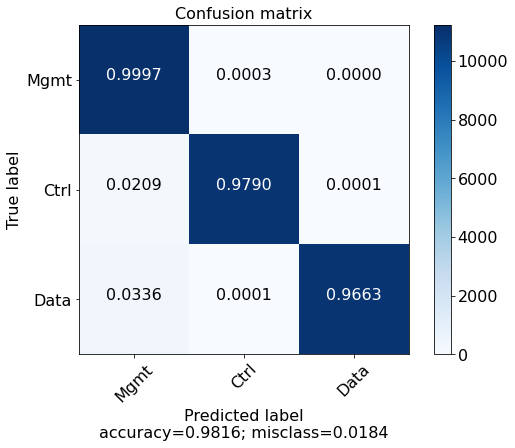

This is experiment:  2  with  1000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 1000, 2) (33820, 1000, 2) (33821, 1000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2781 - accuracy: 0.9076
Epoch 00001: val_loss improved from inf to 0.15377, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 479s 97ms/step - loss: 0.2781 - accuracy: 0.9076 - val_loss: 0.1538 - val_accuracy: 0.9652
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9645
Epoch 00002: val_loss improved from 0.15377 to 0.14441, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 477s 97ms/step - loss: 0.1

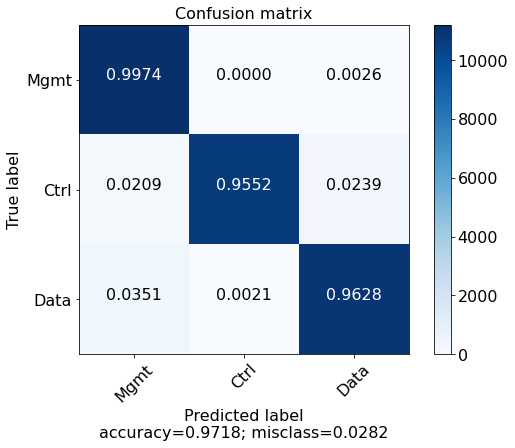

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 1000, 1) (33820, 2, 1000, 1) (33821, 2, 1000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.1223 - accuracy: 0.9738
Epoch 00001: val_loss improved from inf to 0.09612, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.1222 - accuracy: 0.9738 - val_loss: 0.0961 - val_accuracy: 0.9794
Epoch 2/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9796
Epoch 00002: val_loss improved from 0.09612 to 0.09393, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.0970 - accuracy: 0.9796 - val_loss: 0.0939 - val_accuracy: 

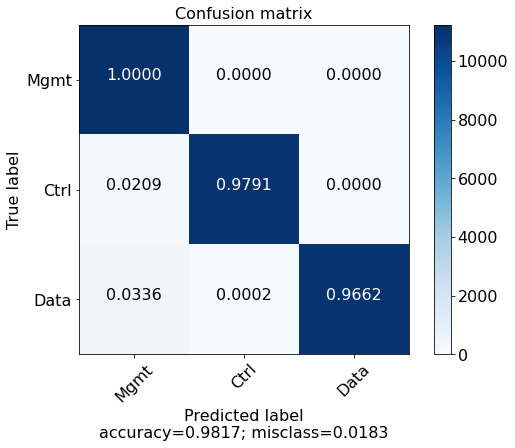

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.9745
Epoch 00001: val_loss improved from inf to 0.09422, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 71s 14ms/step - loss: 0.1101 - accuracy: 0.9745 - val_loss: 0.0942 - val_accuracy: 0.9794
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9799
Epoch 00002: val_loss improved from 0.09422 to 0.09288, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 71s 14ms/step - loss: 0.0926 - accuracy: 0.9799 - val_loss:

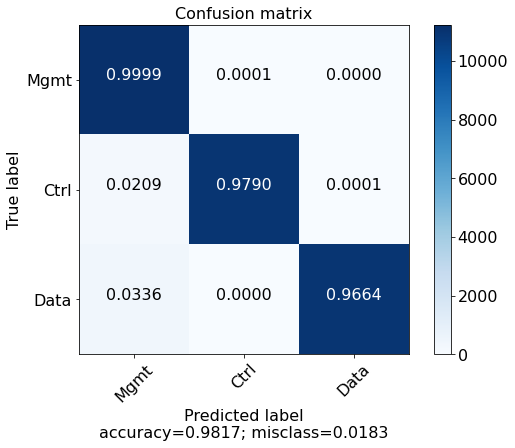

This is experiment:  3  with  1000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 1000, 2) (33820, 1000, 2) (33821, 1000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8811
Epoch 00001: val_loss improved from inf to 0.16347, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 476s 96ms/step - loss: 0.3213 - accuracy: 0.8811 - val_loss: 0.1635 - val_accuracy: 0.9632
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9473
Epoch 00002: val_loss improved from 0.16347 to 0.14047, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 475s 96ms/step - loss: 0.1

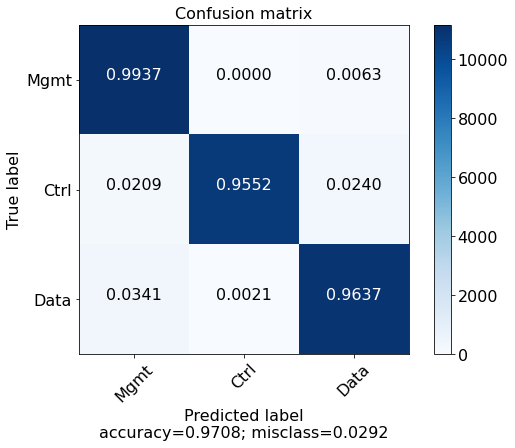

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 1000, 1) (33820, 2, 1000, 1) (33821, 2, 1000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.9737
Epoch 00001: val_loss improved from inf to 0.09830, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.1226 - accuracy: 0.9738 - val_loss: 0.0983 - val_accuracy: 0.9794
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9795
Epoch 00002: val_loss improved from 0.09830 to 0.09347, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.0969 - accuracy: 0.9795 - val_loss: 0.0935 - val_accuracy: 

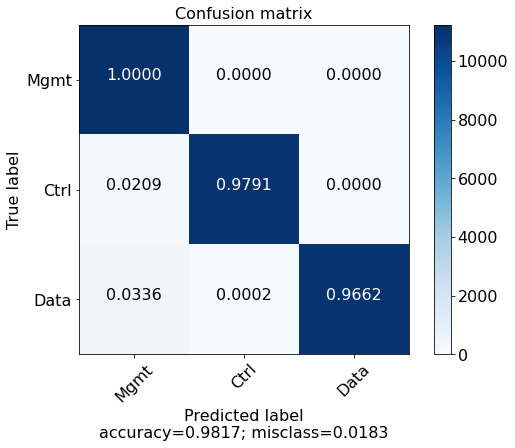

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1067 - accuracy: 0.9762
Epoch 00001: val_loss improved from inf to 0.09640, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 72s 15ms/step - loss: 0.1067 - accuracy: 0.9762 - val_loss: 0.0964 - val_accuracy: 0.9788
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0910 - accuracy: 0.9799
Epoch 00002: val_loss improved from 0.09640 to 0.09189, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 71s 14ms/step - loss: 0.0910 - accuracy: 0.9799 - val_loss:

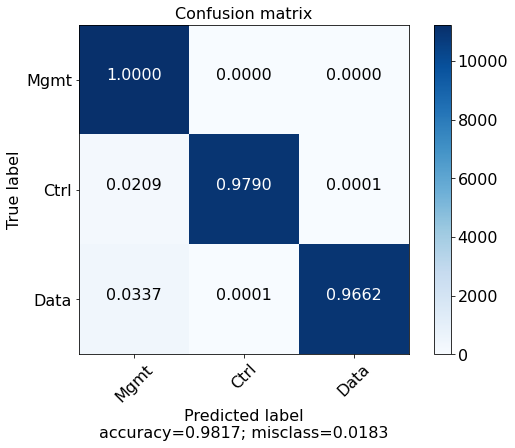

This is experiment:  4  with  1000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 1000, 2) (33820, 1000, 2) (33821, 1000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3166 - accuracy: 0.8872
Epoch 00001: val_loss improved from inf to 0.18597, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 484s 98ms/step - loss: 0.3166 - accuracy: 0.8872 - val_loss: 0.1860 - val_accuracy: 0.9549
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2009 - accuracy: 0.9484
Epoch 00002: val_loss improved from 0.18597 to 0.17310, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 481s 97ms/step - loss: 0.2

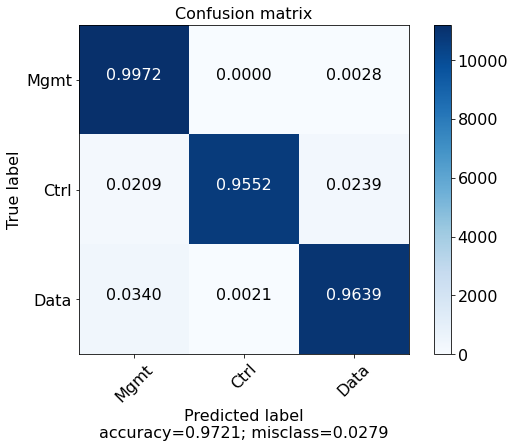

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 1000, 1) (33820, 2, 1000, 1) (33821, 2, 1000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4927/4933 [============================>.] - ETA: 0s - loss: 0.1233 - accuracy: 0.9736
Epoch 00001: val_loss improved from inf to 0.09746, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.1232 - accuracy: 0.9736 - val_loss: 0.0975 - val_accuracy: 0.9795
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9796
Epoch 00002: val_loss improved from 0.09746 to 0.09398, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.0965 - accuracy: 0.9796 - val_loss: 0.0940 - val_accuracy: 

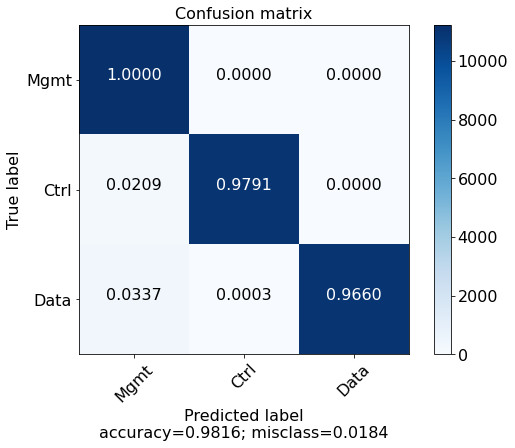

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.9756
Epoch 00001: val_loss improved from inf to 0.09238, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 72s 15ms/step - loss: 0.1075 - accuracy: 0.9756 - val_loss: 0.0924 - val_accuracy: 0.9795
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0905 - accuracy: 0.9801
Epoch 00002: val_loss improved from 0.09238 to 0.09143, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 71s 14ms/step - loss: 0.0905 - accuracy: 0.9801 - val_loss:

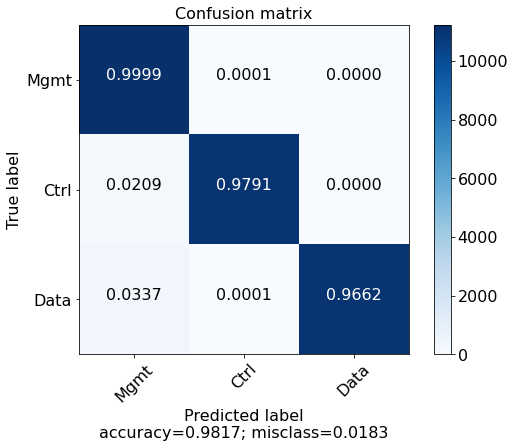

This is experiment:  5  with  1000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 1000, 2) (33820, 1000, 2) (33821, 1000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2783 - accuracy: 0.9081
Epoch 00001: val_loss improved from inf to 0.36046, saving model to ./270720084326_iq_samples_1000_LSTM_iq_samples_1000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 477s 97ms/step - loss: 0.2783 - accuracy: 0.9081 - val_loss: 0.3605 - val_accuracy: 0.8602
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.9634
Epoch 00002: val_loss did not improve from 0.36046
4933/4933 [==============================] - 476s 96ms/step - loss: 0.1627 - accuracy: 0.9634 - val_loss: 0.3656 - val_accuracy: 0.8622
Epoch 3/30
4933/4933 [==============================] - E

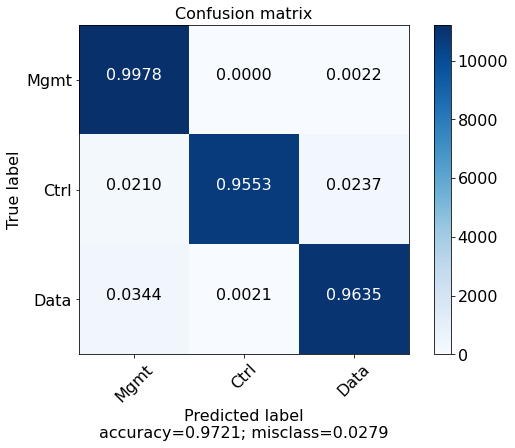

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 1000, 1) (33820, 2, 1000, 1) (33821, 2, 1000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.1228 - accuracy: 0.9736
Epoch 00001: val_loss improved from inf to 0.09759, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 39s 8ms/step - loss: 0.1228 - accuracy: 0.9736 - val_loss: 0.0976 - val_accuracy: 0.9797
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0959 - accuracy: 0.9796
Epoch 00002: val_loss improved from 0.09759 to 0.09521, saving model to ./270720084326_iq_samples_1000_CNN_iq_samples_1000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 38s 8ms/step - loss: 0.0959 - accuracy: 0.9796 - val_loss: 0.0952 - val_accuracy: 

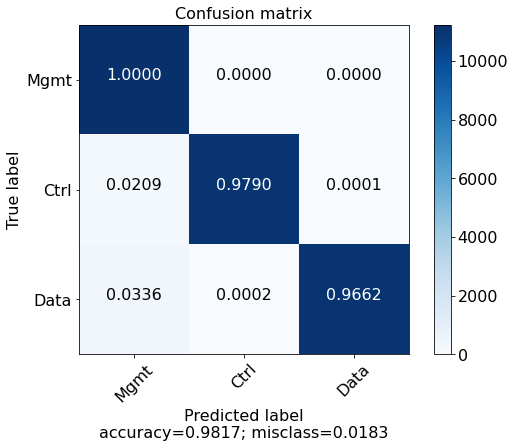

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 1000) (33820, 2, 1000) (33821, 2, 1000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.1067 - accuracy: 0.9762
Epoch 00001: val_loss improved from inf to 0.09470, saving model to ./270720084326_iq_samples_1000_Wavenet_iq_samples_1000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.1067 - accuracy: 0.9762 - val_loss: 0.0947 - val_accuracy: 0.9784
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9801
Epoch 00002: val_loss did not improve from 0.09470
4933/4933 [==============================] - 71s 14ms/step - loss: 0.0908 - accuracy: 0.9801 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 3/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9

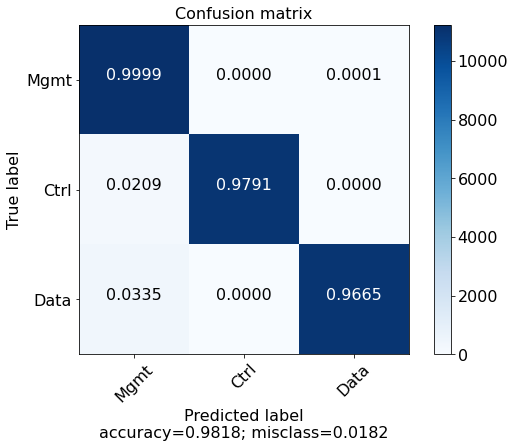

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

  0%|          | 826/225468 [00:00<00:27, 8259.44it/s]

Padding/Truncating sequence  2000


100%|██████████| 225468/225468 [00:19<00:00, 11283.62it/s]


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
This is experiment:  1  with  2000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 2000, 2) (33820, 2000, 2) (33821, 2000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.8041
Epoch 00001: val_loss improved from inf to 0.36802, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 913s 185ms/step - loss: 0.4835 - accuracy: 0.8041 - val_loss: 0.3680 - val_accuracy: 0.8684
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9343
Epoch 00002: val_loss did not impr

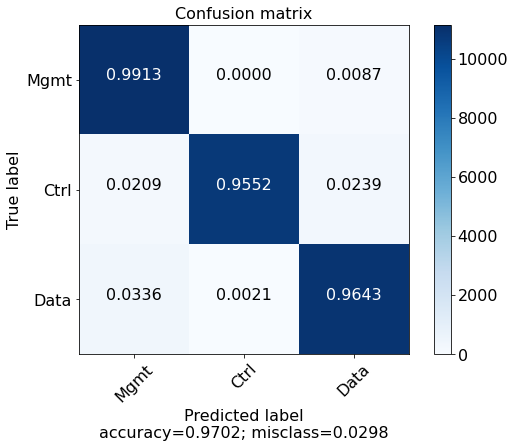

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 2000, 1) (33820, 2, 2000, 1) (33821, 2, 2000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9793
Epoch 00001: val_loss improved from inf to 0.03525, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 53s 11ms/step - loss: 0.0823 - accuracy: 0.9793 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 2/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9886
Epoch 00002: val_loss improved from 0.03525 to 0.02822, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 52s 11ms/step - loss: 0.0414 - accuracy: 0.9887 - val_loss: 0.0282 - val_accuracy

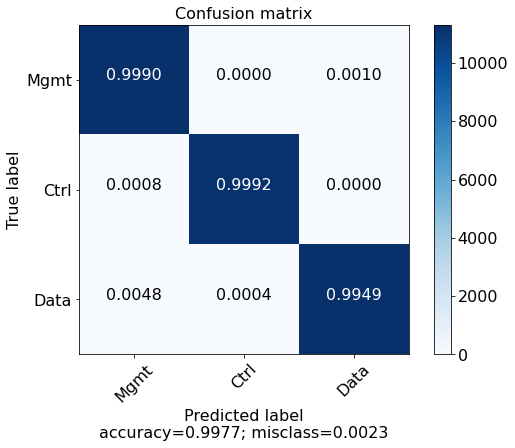

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9768
Epoch 00001: val_loss improved from inf to 0.10652, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 113s 23ms/step - loss: 0.1039 - accuracy: 0.9768 - val_loss: 0.1065 - val_accuracy: 0.9773
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.9876
Epoch 00002: val_loss improved from 0.10652 to 0.01938, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 112s 23ms/step - loss: 0.0485 - accuracy: 0.9876 - val_los

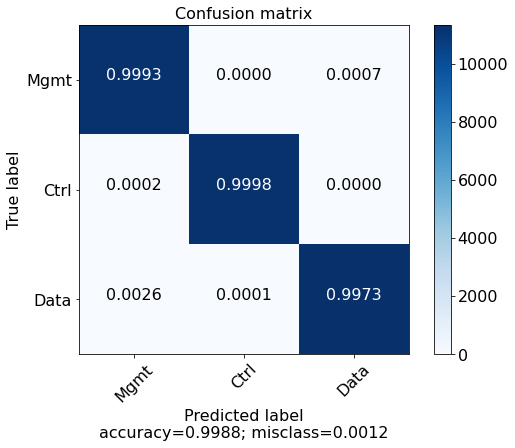

This is experiment:  2  with  2000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 2000, 2) (33820, 2000, 2) (33821, 2000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4236 - accuracy: 0.8325
Epoch 00001: val_loss improved from inf to 0.25533, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 889s 180ms/step - loss: 0.4236 - accuracy: 0.8325 - val_loss: 0.2553 - val_accuracy: 0.9391
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.9502
Epoch 00002: val_loss improved from 0.25533 to 0.18815, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 884s 179ms/step - loss: 0

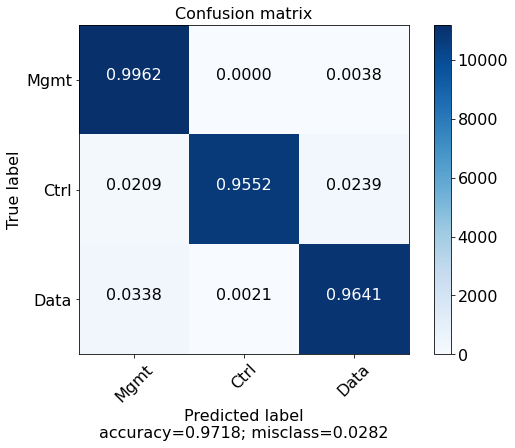

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 2000, 1) (33820, 2, 2000, 1) (33821, 2, 2000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0900 - accuracy: 0.9769
Epoch 00001: val_loss improved from inf to 0.04594, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 53s 11ms/step - loss: 0.0900 - accuracy: 0.9769 - val_loss: 0.0459 - val_accuracy: 0.9876
Epoch 2/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9880
Epoch 00002: val_loss improved from 0.04594 to 0.02949, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 52s 11ms/step - loss: 0.0437 - accuracy: 0.9880 - val_loss: 0.0295 - val_accuracy

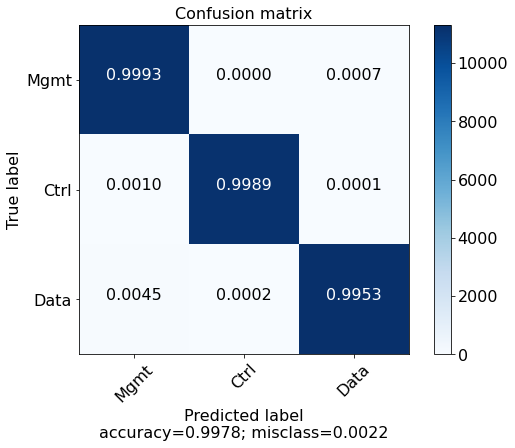

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9758
Epoch 00001: val_loss improved from inf to 0.09484, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 112s 23ms/step - loss: 0.1048 - accuracy: 0.9758 - val_loss: 0.0948 - val_accuracy: 0.9791
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9798
Epoch 00002: val_loss did not improve from 0.09484
4933/4933 [==============================] - 112s 23ms/step - loss: 0.0929 - accuracy: 0.9798 - val_loss: 0.1248 - val_accuracy: 0.9792
Epoch 3/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0787 - accuracy: 0

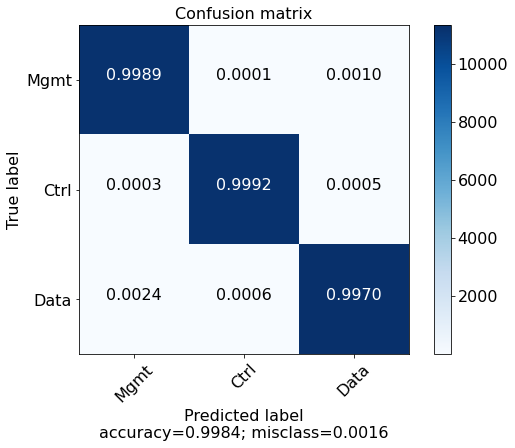

This is experiment:  3  with  2000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 2000, 2) (33820, 2000, 2) (33821, 2000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.8166
Epoch 00001: val_loss improved from inf to 0.34342, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 883s 179ms/step - loss: 0.4609 - accuracy: 0.8166 - val_loss: 0.3434 - val_accuracy: 0.8755
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3464 - accuracy: 0.8775
Epoch 00002: val_loss did not improve from 0.34342
4933/4933 [==============================] - 885s 179ms/step - loss: 0.3464 - accuracy: 0.8775 - val_loss: 0.8191 - val_accuracy: 0.7000
Epoch 3/30
4933/4933 [==============================] -

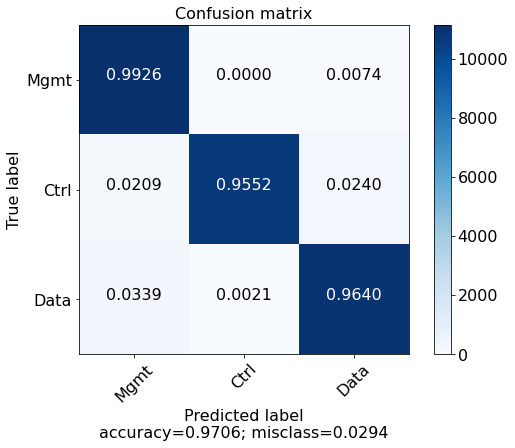

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 2000, 1) (33820, 2, 2000, 1) (33821, 2, 2000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0829 - accuracy: 0.9791
Epoch 00001: val_loss improved from inf to 0.03492, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 55s 11ms/step - loss: 0.0829 - accuracy: 0.9791 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.9885
Epoch 00002: val_loss improved from 0.03492 to 0.03112, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 56s 11ms/step - loss: 0.0421 - accuracy: 0.9885 - val_loss: 0.0311 - val_accuracy

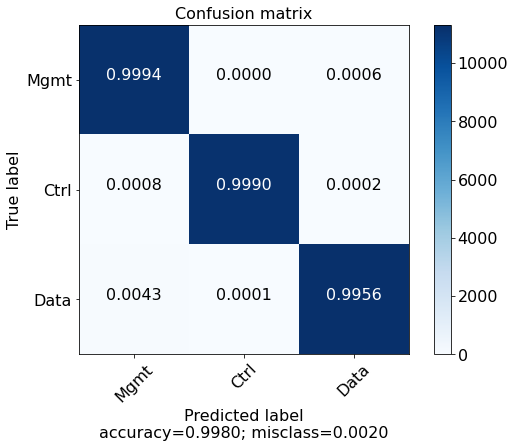

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1041 - accuracy: 0.9767
Epoch 00001: val_loss improved from inf to 0.09698, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 114s 23ms/step - loss: 0.1041 - accuracy: 0.9767 - val_loss: 0.0970 - val_accuracy: 0.9791
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9799
Epoch 00002: val_loss improved from 0.09698 to 0.09309, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 113s 23ms/step - loss: 0.0922 - accuracy: 0.9799 - val_los

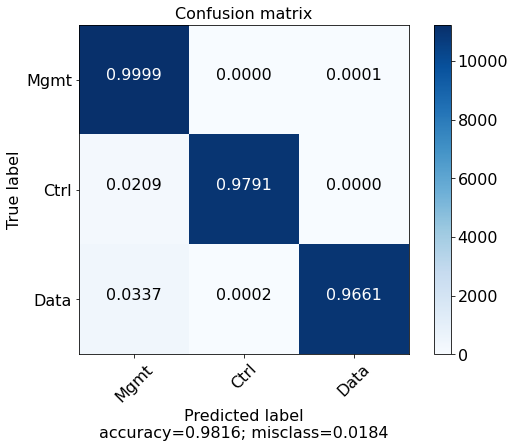

This is experiment:  4  with  2000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 2000, 2) (33820, 2000, 2) (33821, 2000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4886 - accuracy: 0.8025
Epoch 00001: val_loss improved from inf to 0.63467, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 905s 183ms/step - loss: 0.4886 - accuracy: 0.8025 - val_loss: 0.6347 - val_accuracy: 0.6522
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.8971
Epoch 00002: val_loss did not improve from 0.63467
4933/4933 [==============================] - 905s 183ms/step - loss: 0.3091 - accuracy: 0.8971 - val_loss: 0.6509 - val_accuracy: 0.6730
Epoch 3/30
4933/4933 [==============================] -

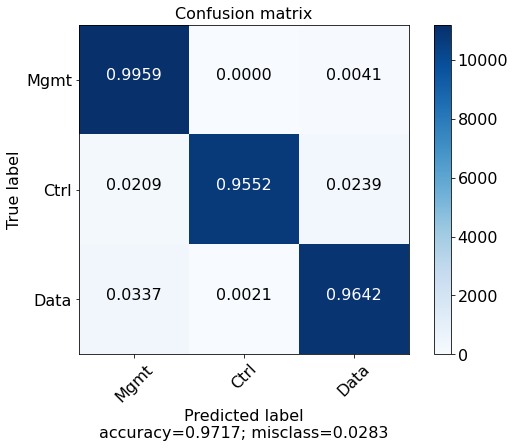

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 2000, 1) (33820, 2, 2000, 1) (33821, 2, 2000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9785
Epoch 00001: val_loss improved from inf to 0.03743, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 54s 11ms/step - loss: 0.0868 - accuracy: 0.9785 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 2/30
4930/4933 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9886
Epoch 00002: val_loss improved from 0.03743 to 0.02687, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 54s 11ms/step - loss: 0.0426 - accuracy: 0.9885 - val_loss: 0.0269 - val_accuracy

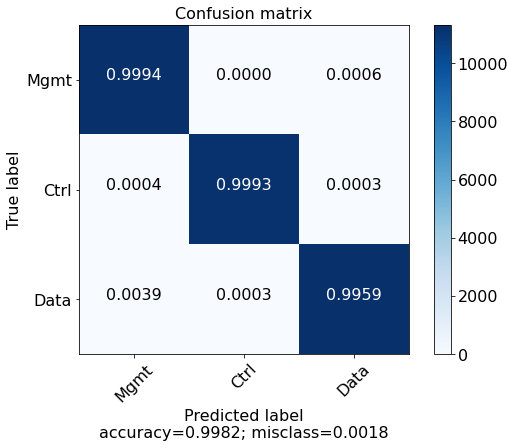

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.1065 - accuracy: 0.9751
Epoch 00001: val_loss improved from inf to 0.10269, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 113s 23ms/step - loss: 0.1065 - accuracy: 0.9751 - val_loss: 0.1027 - val_accuracy: 0.9790
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9811
Epoch 00002: val_loss improved from 0.10269 to 0.03313, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 112s 23ms/step - loss: 0.0788 - accuracy: 0.9811 - val_los

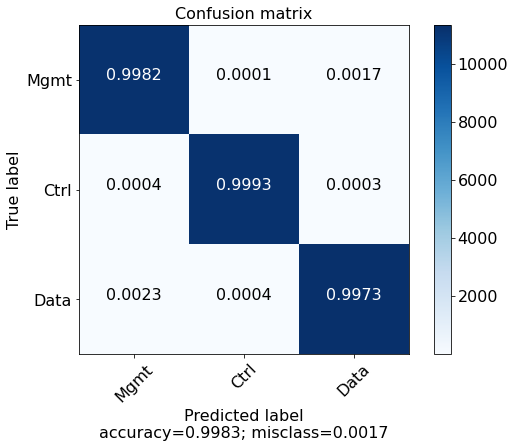

This is experiment:  5  with  2000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 2000, 2) (33820, 2000, 2) (33821, 2000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.8124
Epoch 00001: val_loss improved from inf to 1.08430, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 892s 181ms/step - loss: 0.4644 - accuracy: 0.8124 - val_loss: 1.0843 - val_accuracy: 0.5215
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2493 - accuracy: 0.9225
Epoch 00002: val_loss improved from 1.08430 to 0.16386, saving model to ./270720084326_iq_samples_2000_LSTM_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 892s 181ms/step - loss: 0

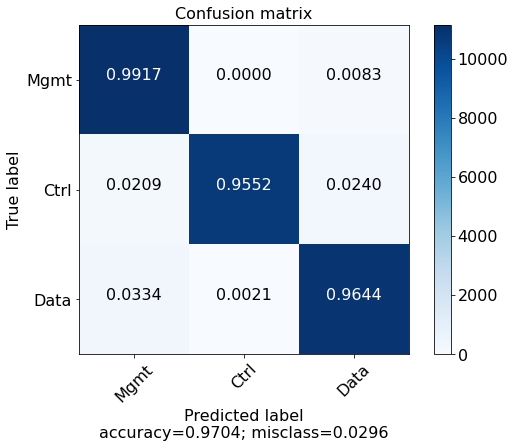

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 2000, 1) (33820, 2, 2000, 1) (33821, 2, 2000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0809 - accuracy: 0.9788
Epoch 00001: val_loss improved from inf to 0.04201, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 54s 11ms/step - loss: 0.0808 - accuracy: 0.9788 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 2/30
4928/4933 [============================>.] - ETA: 0s - loss: 0.0418 - accuracy: 0.9884
Epoch 00002: val_loss improved from 0.04201 to 0.02829, saving model to ./270720084326_iq_samples_2000_CNN_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 54s 11ms/step - loss: 0.0418 - accuracy: 0.9884 - val_loss: 0.0283 - val_accuracy

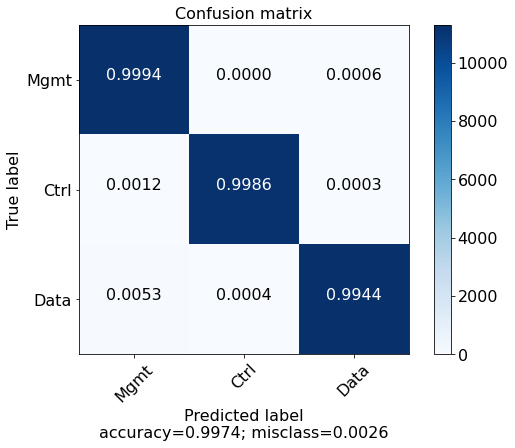

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 2000) (33820, 2, 2000) (33821, 2, 2000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9764
Epoch 00001: val_loss improved from inf to 0.09460, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 113s 23ms/step - loss: 0.1043 - accuracy: 0.9764 - val_loss: 0.0946 - val_accuracy: 0.9791
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9805
Epoch 00002: val_loss improved from 0.09460 to 0.05809, saving model to ./270720084326_iq_samples_2000_Wavenet_iq_samples_2000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 112s 23ms/step - loss: 0.0819 - accuracy: 0.9805 - val_los

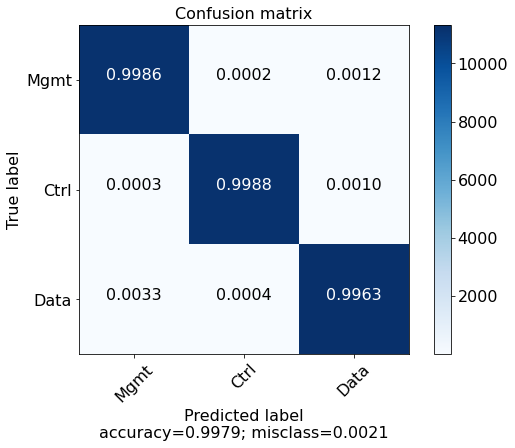

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

  0%|          | 35/225468 [00:00<12:23, 303.20it/s]

Padding/Truncating sequence  3000


100%|██████████| 225468/225468 [01:47<00:00, 2103.62it/s]


Oneshot labels
Labels created
Performing data splitting
Starting first partitioning
First partitioning done. Starting partitioning 2
Final partitioning done
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
This is experiment:  1  with  3000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 3000, 2) (33820, 3000, 2) (33821, 3000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.8105
Epoch 00001: val_loss improved from inf to 0.59347, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 1368s 277ms/step - loss: 0.4679 - accuracy: 0.8105 - val_loss: 0.5935 - val_accuracy: 0.6922
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.8792
Epoch 00002: val_loss improved fr

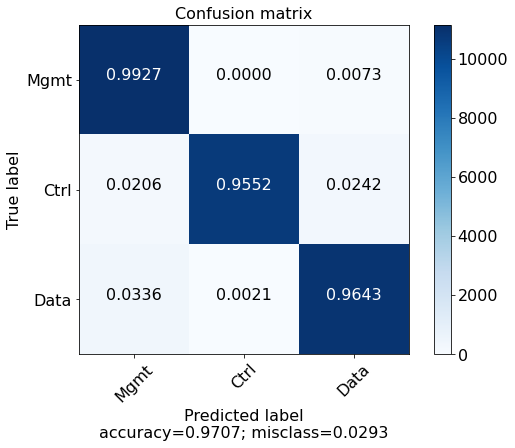

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 3000, 1) (33820, 2, 3000, 1) (33821, 2, 3000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9843
Epoch 00001: val_loss improved from inf to 0.02097, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 75s 15ms/step - loss: 0.0606 - accuracy: 0.9843 - val_loss: 0.0210 - val_accuracy: 0.9953
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9937
Epoch 00002: val_loss improved from 0.02097 to 0.01462, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.0146 - val_accuracy

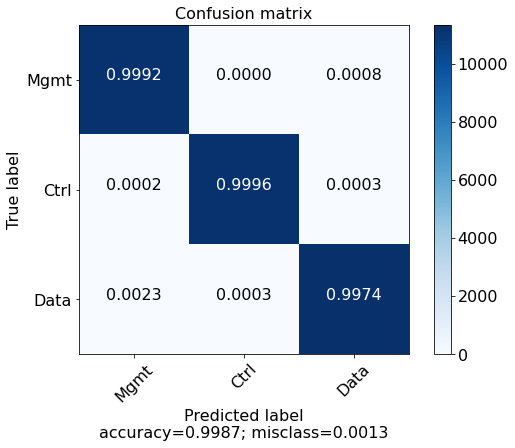

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9838
Epoch 00001: val_loss improved from inf to 0.01184, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_1_wlan_L2_classifier.h5
4933/4933 [==============================] - 165s 34ms/step - loss: 0.0622 - accuracy: 0.9838 - val_loss: 0.0118 - val_accuracy: 0.9971
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9970
Epoch 00002: val_loss did not improve from 0.01184
4933/4933 [==============================] - 163s 33ms/step - loss: 0.0202 - accuracy: 0.9970 - val_loss: 0.0417 - val_accuracy: 0.9893
Epoch 3/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0

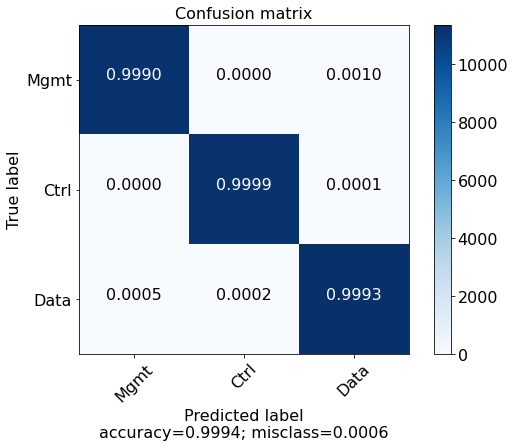

This is experiment:  2  with  3000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 3000, 2) (33820, 3000, 2) (33821, 3000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4951 - accuracy: 0.7974
Epoch 00001: val_loss improved from inf to 0.44526, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 1300s 264ms/step - loss: 0.4951 - accuracy: 0.7974 - val_loss: 0.4453 - val_accuracy: 0.8289
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.3447 - accuracy: 0.8794
Epoch 00002: val_loss did not improve from 0.44526
4933/4933 [==============================] - 1301s 264ms/step - loss: 0.3447 - accuracy: 0.8794 - val_loss: 0.9588 - val_accuracy: 0.6590
Epoch 3/30
4933/4933 [==============================]

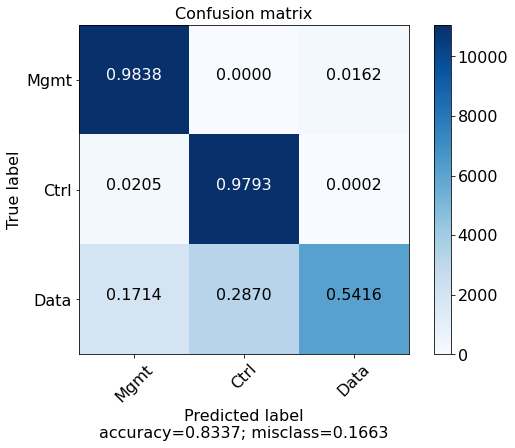

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 3000, 1) (33820, 2, 3000, 1) (33821, 2, 3000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9846
Epoch 00001: val_loss improved from inf to 0.02083, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 74s 15ms/step - loss: 0.0583 - accuracy: 0.9846 - val_loss: 0.0208 - val_accuracy: 0.9953
Epoch 2/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9943
Epoch 00002: val_loss improved from 0.02083 to 0.01586, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.0159 - val_accuracy

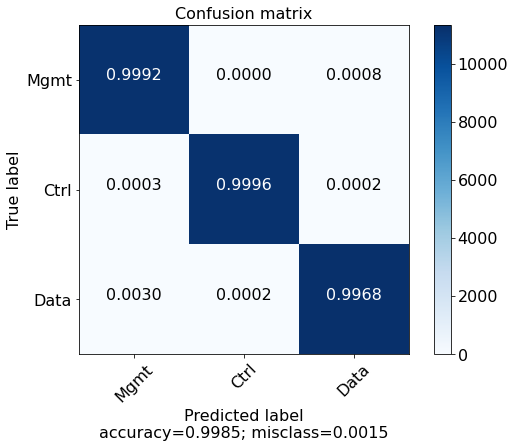

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0697 - accuracy: 0.9824
Epoch 00001: val_loss improved from inf to 0.02402, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 165s 34ms/step - loss: 0.0697 - accuracy: 0.9824 - val_loss: 0.0240 - val_accuracy: 0.9939
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9954
Epoch 00002: val_loss improved from 0.02402 to 0.01329, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_2_wlan_L2_classifier.h5
4933/4933 [==============================] - 163s 33ms/step - loss: 0.0183 - accuracy: 0.9954 - val_los

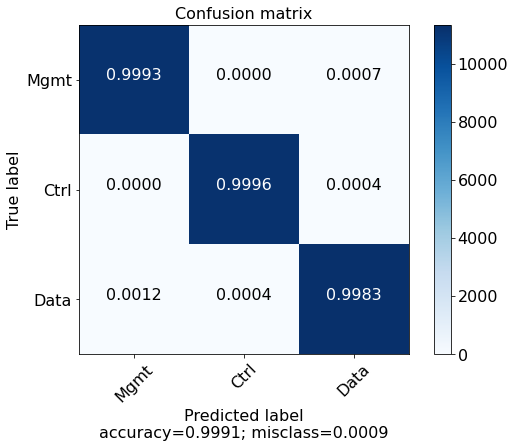

This is experiment:  3  with  3000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 3000, 2) (33820, 3000, 2) (33821, 3000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7758
Epoch 00001: val_loss improved from inf to 0.45136, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 1241s 252ms/step - loss: 0.5304 - accuracy: 0.7758 - val_loss: 0.4514 - val_accuracy: 0.8233
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8508
Epoch 00002: val_loss did not improve from 0.45136
4933/4933 [==============================] - 1239s 251ms/step - loss: 0.4130 - accuracy: 0.8508 - val_loss: 0.4874 - val_accuracy: 0.8132
Epoch 3/30
4933/4933 [==============================]

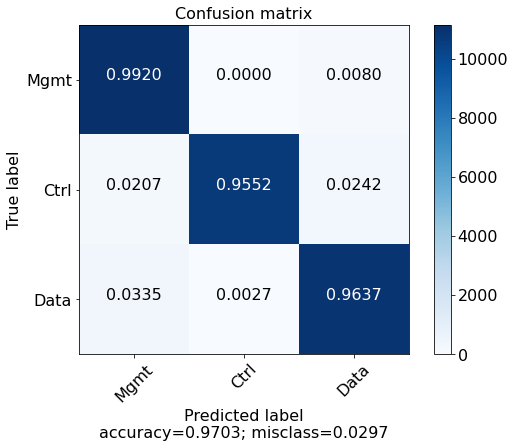

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 3000, 1) (33820, 2, 3000, 1) (33821, 2, 3000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9838
Epoch 00001: val_loss improved from inf to 0.01748, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 74s 15ms/step - loss: 0.0610 - accuracy: 0.9838 - val_loss: 0.0175 - val_accuracy: 0.9959
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9938
Epoch 00002: val_loss improved from 0.01748 to 0.01438, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 0.0144 - val_accuracy

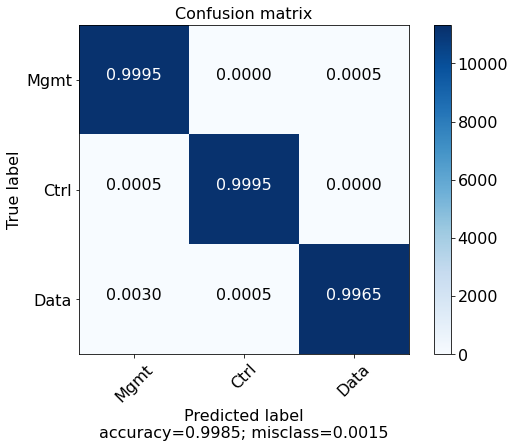

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9740
Epoch 00001: val_loss improved from inf to 0.09677, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_3_wlan_L2_classifier.h5
4933/4933 [==============================] - 163s 33ms/step - loss: 0.1094 - accuracy: 0.9740 - val_loss: 0.0968 - val_accuracy: 0.9789
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9797
Epoch 00002: val_loss did not improve from 0.09677
4933/4933 [==============================] - 161s 33ms/step - loss: 0.0937 - accuracy: 0.9797 - val_loss: 0.0993 - val_accuracy: 0.9784
Epoch 3/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0

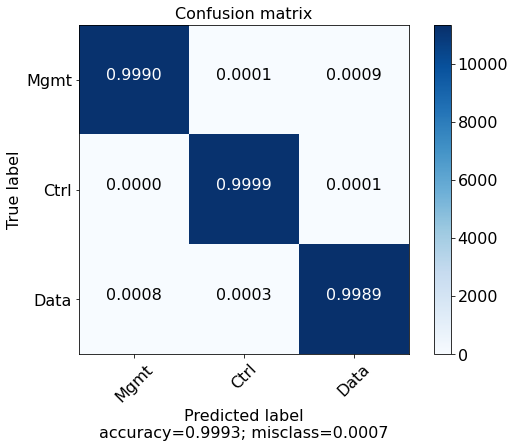

This is experiment:  4  with  3000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 3000, 2) (33820, 3000, 2) (33821, 3000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.8171
Epoch 00001: val_loss improved from inf to 0.92633, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 1265s 256ms/step - loss: 0.4692 - accuracy: 0.8171 - val_loss: 0.9263 - val_accuracy: 0.6245
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.2084 - accuracy: 0.9419
Epoch 00002: val_loss improved from 0.92633 to 0.38102, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 1262s 256ms/step - loss:

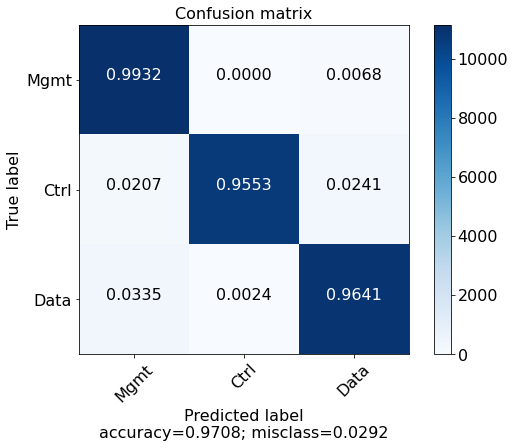

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 3000, 1) (33820, 2, 3000, 1) (33821, 2, 3000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4932/4933 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9843
Epoch 00001: val_loss improved from inf to 0.01882, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 74s 15ms/step - loss: 0.0586 - accuracy: 0.9843 - val_loss: 0.0188 - val_accuracy: 0.9957
Epoch 2/30
4929/4933 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9937
Epoch 00002: val_loss improved from 0.01882 to 0.01476, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.0148 - val_accuracy

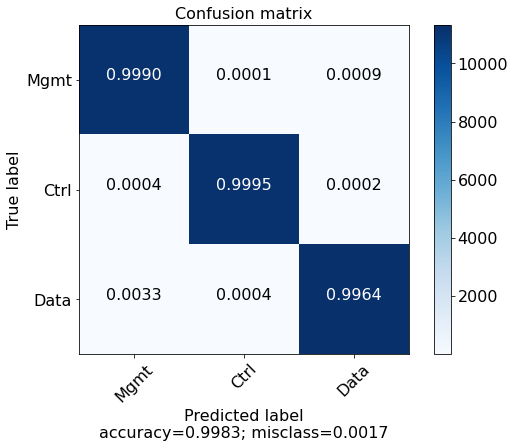

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9800
Epoch 00001: val_loss improved from inf to 0.02045, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 165s 33ms/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 0.0204 - val_accuracy: 0.9958
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9961
Epoch 00002: val_loss improved from 0.02045 to 0.01244, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_4_wlan_L2_classifier.h5
4933/4933 [==============================] - 162s 33ms/step - loss: 0.0158 - accuracy: 0.9961 - val_los

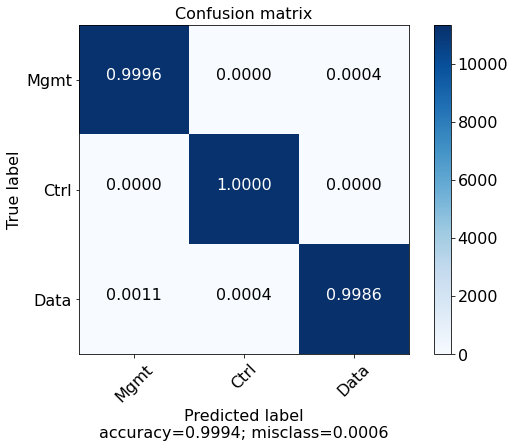

This is experiment:  5  with  3000 IQ samples per example
Starting data preparation and training for model  LSTM
Re-shaping for LSTM
(157827, 3000, 2) (33820, 3000, 2) (33821, 3000, 2)
Creating the model
Model type LSTM
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.8004
Epoch 00001: val_loss improved from inf to 0.42458, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 1277s 259ms/step - loss: 0.4979 - accuracy: 0.8004 - val_loss: 0.4246 - val_accuracy: 0.8619
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.4203 - accuracy: 0.8465
Epoch 00002: val_loss improved from 0.42458 to 0.36433, saving model to ./270720084326_iq_samples_3000_LSTM_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 1273s 258ms/step - loss:

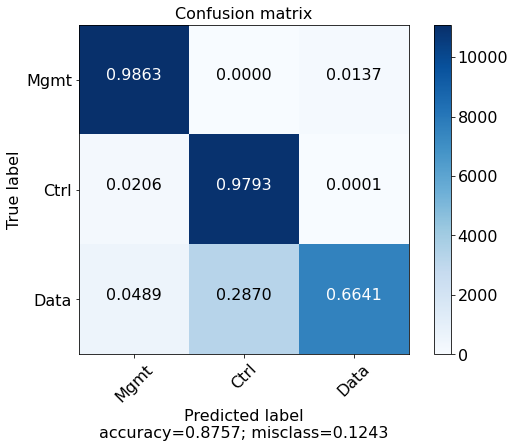

Starting data preparation and training for model  CNN
Re-shaping for CNN
(157827, 2, 3000, 1) (33820, 2, 3000, 1) (33821, 2, 3000, 1)
Creating the model
Model type CNN
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9841
Epoch 00001: val_loss improved from inf to 0.02155, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 74s 15ms/step - loss: 0.0615 - accuracy: 0.9841 - val_loss: 0.0216 - val_accuracy: 0.9949
Epoch 2/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9937
Epoch 00002: val_loss improved from 0.02155 to 0.01494, saving model to ./270720084326_iq_samples_3000_CNN_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 73s 15ms/step - loss: 0.0241 - accuracy: 0.9937 - val_loss: 0.0149 - val_accuracy

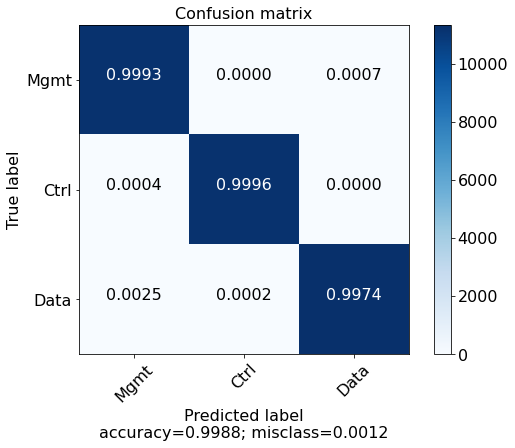

Starting data preparation and training for model  Wavenet
No need of Re-shaping for Wavenet
(157827, 2, 3000) (33820, 2, 3000) (33821, 2, 3000)
Creating the model
Model type Wavenet
Model created
Model start training
Epoch 1/30
4933/4933 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9843
Epoch 00001: val_loss improved from inf to 0.01230, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 164s 33ms/step - loss: 0.0573 - accuracy: 0.9843 - val_loss: 0.0123 - val_accuracy: 0.9973
Epoch 2/30
4931/4933 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9975
Epoch 00002: val_loss improved from 0.01230 to 0.00432, saving model to ./270720084326_iq_samples_3000_Wavenet_iq_samples_3000_num_classes_3_experiment_5_wlan_L2_classifier.h5
4933/4933 [==============================] - 163s 33ms/step - loss: 0.0094 - accuracy: 0.9975 - val_los

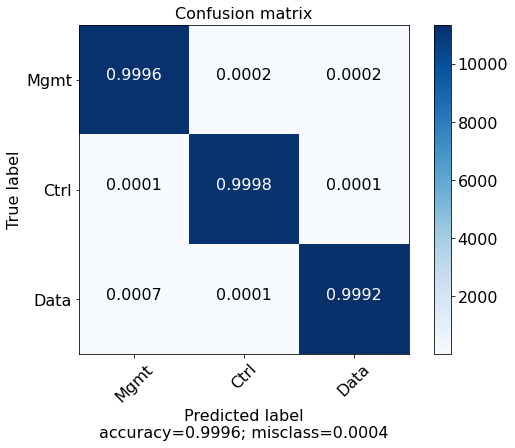

{'LSTM': {100: [{'Training': [0.5512394309043884, 0.658689558506012], 'Validation': [0.5552101135253906, 0.6523358821868896], 'Test': [0.5487771034240723, 0.6549776792526245], 'mean_epoch': 82.53527329184793}, {'Training': [0.5512476563453674, 0.6516692042350769], 'Validation': [0.5552170872688293, 0.6539030075073242], 'Test': [0.5486889481544495, 0.6548594236373901], 'mean_epoch': 87.14453871433551}, {'Training': [0.5514832139015198, 0.6586832404136658], 'Validation': [0.5553891658782959, 0.652306318283081], 'Test': [0.5483983755111694, 0.6549481153488159], 'mean_epoch': 87.73530392646789}, {'Training': [0.5514261722564697, 0.6516945958137512], 'Validation': [0.5550246238708496, 0.6538143157958984], 'Test': [0.5489296317100525, 0.6548594236373901], 'mean_epoch': 86.59891294030582}, {'Training': [0.5521621108055115, 0.6586959362030029], 'Validation': [0.5559711456298828, 0.6523950099945068], 'Test': [0.5496894121170044, 0.6549776792526245], 'mean_epoch': 64.38277023179191}], 300: [{'Tr

In [6]:
experiment_results = {}

for num_iq_seq in max_iq_samples:
    
    prefix = str(datenow)+"_iq_samples_"+str(num_iq_seq)
    gc.collect()
    time.sleep(2)
    print("Padding/Truncating sequence ",str(num_iq_seq))
    X = classifier_utils.pad_or_trunc_x_and_scale(Xraw, num_iq_seq, padding, scale=False)
    time.sleep(2)
    
    print("Oneshot labels")
    Y = classifier_utils.get_one_hot_labels(Yraw, num_classes, label)
    
    print("Performing data splitting")
    #Partitioning for adapting input to LSTM
    X_train, X_val, X_test, Y_train, Y_val, Y_test = classifier_utils.get_xy_4_training(X,Y,seed)
    print(X_train.shape,X_val.shape, X_test.shape)

    gc.collect()
    for exp in num_repetitions:
        
        print("This is experiment: ", str(exp), " with ", str(num_iq_seq), "IQ samples per example")
        
        for model_type in models_to_train:
        
            prefix_model = prefix+'_'+model_type+'_iq_samples_'+str(num_iq_seq)+'_num_classes_'+str(num_classes)+'_experiment_'+str(exp)+'_wlan_L2'
            
            print('Starting data preparation and training for model ', model_type)
            X_train_rs, X_val_rs, X_test_rs = classifier_utils.reshape_for_model(model_type, X_train, X_val, X_test)
            print(X_train_rs.shape,X_val_rs.shape, X_test_rs.shape)
            gc.collect()

            result, model = classifier_utils.create_and_train_model(model_type, num_iq_seq, num_classes, prefix_model, X_train_rs, Y_train, X_val_rs, Y_val, X_test_rs, Y_test, save=True, epochs = epochs)
            
            epoch_times = model.get_time_per_epoch()
            mean_training_time_epoch = np.mean(epoch_times, axis=0)
            #(epoch_times, mean_training_time_epoch)
            
            result['mean_epoch']=mean_training_time_epoch
            experiment_results = classifier_utils.add_result(experiment_results, model_type, num_iq_seq, result)

            
            if exp ==1 & show_model:
                model.get_model().summary()

            #Save conf matrix
            file_out_conf_matrix = prefix_model+'_frames_conf_matrix.pdf'
            classifier_utils.compute_and_save_conf_matrix(model, X_test_rs, Y_test, labels_string, filename_prefix = file_out_conf_matrix)
            gc.collect()
    print(experiment_results)

In [7]:
result_file_name = str(datenow)+'_results.json'
classifier_utils.save_results_to_json(result_file_name,experiment_results)

In [8]:
with open(result_file_name) as json_file:
    results_back = json.load(json_file)

In [9]:
print(json.dumps(results_back, indent=4))

{
    "LSTM": {
        "100": [
            {
                "Training": [
                    0.5512394309043884,
                    0.658689558506012
                ],
                "Validation": [
                    0.5552101135253906,
                    0.6523358821868896
                ],
                "Test": [
                    0.5487771034240723,
                    0.6549776792526245
                ],
                "mean_epoch": 82.53527329184793
            },
            {
                "Training": [
                    0.5512476563453674,
                    0.6516692042350769
                ],
                "Validation": [
                    0.5552170872688293,
                    0.6539030075073242
                ],
                "Test": [
                    0.5486889481544495,
                    0.6548594236373901
                ],
                "mean_epoch": 87.14453871433551
            },
            {
                "Training": [
      